<div style="text-align: left; background-color:#B5C4C1; font-family: Times New Roman; color:#404F69; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: #404F69;">Đồ Án</div>

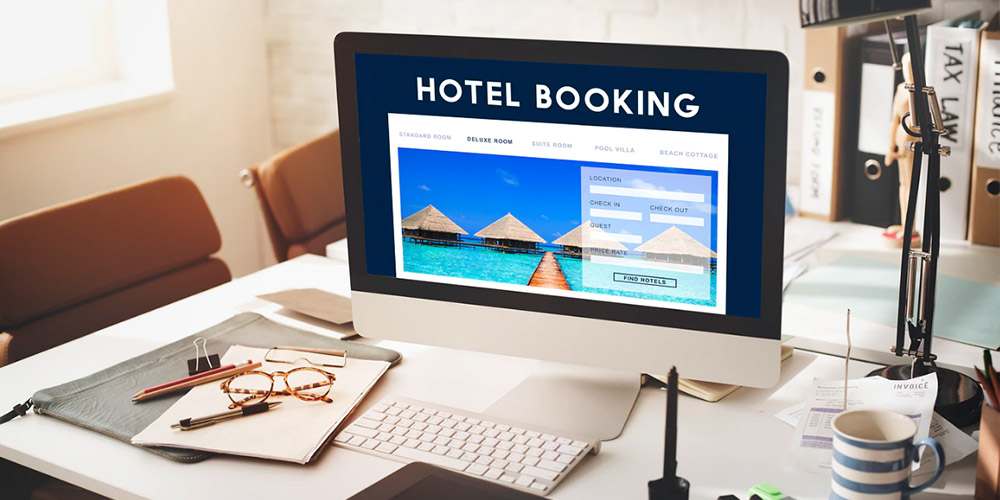

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="text-align: left; background-color:#F2D6AE ; font-family: Times New Roman;  color: #B56C60; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: #B56C60;">Mục lục📝</div>
    
* [1. Data Understanding](#1) 
    
* [2. EDA 1D](#2)
    
* [3. EDA 2D](#3)
    
* [4. EDA 3D](#4)
    
* [5. Insight](#5)
    

<a id="0"></a>
## <div style="text-align: left; background-color:#F2D6AE ; font-family: Times New Roman;  color: #B56C60; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: #B56C60;">0. Import Libraries 📚</div> 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

<a id="1"></a>
## <div style="text-align: left; background-color:#F2D6AE ; font-family: Times New Roman;  color: #B56C60; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: #B56C60;">1. Data Understanding 📚</div> 

In [2]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


<a class = "anchor" id = "1.1"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>1.1 Xét các dòng và các cột</center></span>**

In [3]:
n_rows , n_cols = hotel_df.shape
print(f'Dữ liệu có {n_rows} dòng và {n_cols} cột')

Dữ liệu có 119390 dòng và 32 cột


<a class = "anchor" id = "1.2"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>1.2 Ý nghĩa của từng cột và hàng</center></span>**

In [4]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

+ Mỗi hàng là thông tin của 1 khách hàng đặt phòng khách 

+ Ý nghĩa của từng cột trong dữ liệu được tóm tắt trong bảng sau:

| **TÊN CỘT**                         | **MÔ TẢ**                                       | **KIỂU DỮ LIỆU**   |
|:---------------------------------|:---------------------------------------------|:----------------|
| **`hotel`**                           | Loại khách sạn                              | Chuỗi (String)|
| **`is_canceled`**                     | Đánh dấu liệu đặt phòng đã bị hủy          | Số nguyên (Integer)|
| **`lead_time`**                       | Thời gian từ đặt phòng đến nhận phòng      | Số nguyên (Integer)|
| **`arrival_date_year`**               | Năm của ngày nhận phòng                     | Số nguyên (Integer)|
| **`arrival_date_month`**              | Tháng của ngày nhận phòng                   | Chuỗi (String)|
| **`arrival_date_week_number`**        | Tuần trong năm của ngày nhận phòng          | Số nguyên (Integer)|
| **`arrival_date_day_of_month`**       | Ngày trong tháng của ngày nhận phòng        | Số nguyên (Integer)|
| **`stays_in_weekend_nights`**         | Số đêm nghỉ cuối tuần                       | Số nguyên (Integer)|
| **`stays_in_week_nights`**            | Số đêm nghỉ trong tuần                     | Số nguyên (Integer)|
| **`adults`**                          | Số người lớn                                | Số nguyên (Integer)|
| **`children`**                        | Số trẻ em                                   | Số nguyên (Integer)|
| **`babies`**                          | Số em bé                                    | Số nguyên (Integer)|
| **`meal`**                            | Loại bữa ăn đặt phòng                      | Chuỗi (String)|
| **`country`**                         | Quốc gia của khách hàng                     | Chuỗi (String)|
| **`market_segment`**                  | Phân khúc thị trường                        | Chuỗi (String)|
| **`distribution_channel`**            | Kênh phân phối                              | Chuỗi (String)|
| **`is_repeated_guest`**               | Đánh dấu liệu khách hàng là khách quen trở lại | Số nguyên (Integer)|
| **`previous_cancellations`**          | Số lần hủy đặt phòng trước đó của khách hàng | Số nguyên (Integer)|
| **`previous_bookings_not_canceled`** | Số lần đặt phòng trước đó không bị hủy của khách hàng | Số nguyên (Integer)|
| **`reserved_room_type`**              | Loại phòng được đặt trước                   | Chuỗi (String)|
| **`assigned_room_type`**              | Loại phòng được chỉ định cho khách hàng     | Chuỗi (String)|
| **`booking_changes`**                 | Số lần thay đổi đặt phòng                  | Số nguyên (Integer)|
| **`deposit_type`**                    | Loại tiền đặt cọc đã được thanh toán       | Chuỗi (String)|
| **`agent`**                           | Mã đại lý đặt phòng                         | Số nguyên (Integer)|
| **`company`**                         | Mã công ty đặt phòng                        | Số nguyên (Integer)|
| **`days_in_waiting_list`**            | Số ngày trong danh sách chờ                | Số nguyên (Integer)|
| **`customer_type`**                   | Loại khách hàng                             | Chuỗi (String)|
| **`adr`**                             | Tỉ lệ thuê phòng trung bình                | Số thập phân (Float)|
| **`required_car_parking_spaces`**     | Số lượng chỗ đậu xe cần thiết              | Số nguyên (Integer)|
| **`total_of_special_requests`**       | Tổng số yêu cầu đặc biệt                   | Số nguyên (Integer)|
| **`reservation_status`**              | Trạng thái của đặt phòng                   | Chuỗi (String)|
| **`reservation_status_date`**         | Ngày cập nhật trạng thái đặt phòng         | Chuỗi (String)|


<a class = "anchor" id = "1.3"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>1.3 Kiểm tra và xử lý trùng lắp dữ liệu (Duplicate)</center></span>**

In [5]:
duplicated_rows = hotel_df.duplicated().sum()

if duplicated_rows == 0:
    print('Không có hàng trùng lặp, nghĩa là mỗi hàng trong DataFrame là duy nhất.')
    print('Vì vậy chúng ta không cần tiếp tục xử lý các dòng trùng lặp')
else:
    print(f'Có {duplicated_rows} hàng trùng lặp chiếm tỷ lệ {np.round(duplicated_rows / hotel_df.shape[0] * 100, 2)} % vì vậy nên chúng ta sẽ xóa {duplicated_rows} hàng')
    hotel_df = hotel_df.drop_duplicates()
    print(f'Sau khi xóa các hàng trùng lặp, có {hotel_df.shape[0]} hàng còn lại')

Có 31994 hàng trùng lặp chiếm tỷ lệ 26.8 % vì vậy nên chúng ta sẽ xóa 31994 hàng
Sau khi xóa các hàng trùng lặp, có 87396 hàng còn lại


<a class = "anchor" id = "1.4"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>1.4. Phân tích tỷ lệ thiếu dữ liệu ở hàng và cột (Missing Values)</center></span>**

<h2 style="color:#498059 ;font-size: 1em "><b>👉Tỷ lệ thiếu ở các cột

In [6]:
missing_dict = {}

for col in hotel_df.columns:
    if type(hotel_df[col].iloc[0]) == list:
        missing_dict[col] = hotel_df[col].apply(lambda x: len(x) == 0).sum() / hotel_df.shape[0] * 100
    else:
        missing_dict[col] = hotel_df[col].isna().sum() / hotel_df.shape[0] * 100
        
missing_df = pd.DataFrame({'Missing Ratio (%)': missing_dict})
missing_df = missing_df.sort_values(by='Missing Ratio (%)', ascending=False)
missing_df = missing_df[missing_df['Missing Ratio (%)'] > 0]
missing_df

,Missing Ratio (%)
company,93.982562
agent,13.951439
country,0.517186
children,0.004577


In [7]:
# cols = ['agent', 'country']
# hotel_df[hotel_df['country'].isnull()][cols] # 452 dong
# df = hotel_df.copy()
# df.dropna(subset=cols, how='all', inplace=True)
# df[df['country'].isnull()][cols]
# df['country'].isnull().sum() / df.shape[0] * 100
# # df[df['country'].isnull()]['agent']

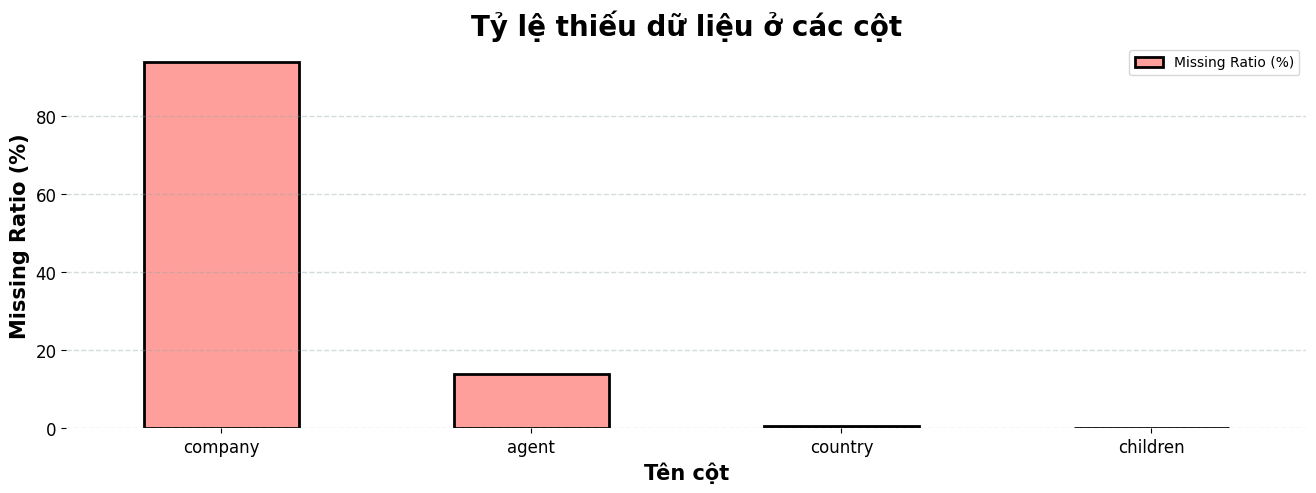

In [8]:
missing_ratio_df = missing_df.copy()
missing_ratio_df.plot(kind='bar', figsize=(16, 5), color='#ff9f9b', linewidth=2, edgecolor='k')
plt.title('Tỷ lệ thiếu dữ liệu ở các cột', fontsize=20, fontweight='bold')
plt.xlabel('Tên cột', fontsize=15, weight='bold')
plt.ylabel('Missing Ratio (%)', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.show()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">
            
- `Company` có tỉ lệ thiếu dữ liệu rất cao, lên đến gần **94%**, nghĩa là phần lớn dữ liệu trong cột này không có sẵn và điều này có thể ảnh hưởng đến khả năng phân tích hoặc cần được xử lý. 
- `Agent` có một lượng dữ liệu bị thiếu đáng kể nhưng không quá lớn, khoảng **14%**. 
- Trong khi đó, `Country` và `Children` gần như đầy đủ với tỉ lệ thiếu hụt rất nhỏ, chỉ lần lượt là khoảng **0.52%** và **0.005%**. 

Sự chênh lệch lớn trong tỉ lệ thiếu hụt giữa các cột cần được chú ý khi xử lý và phân tích dữ liệu để đảm bảo tính chính xác và độ tin cậy của kết quả.

<a class = "anchor" id = "1.5"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>1.5 Xử lý những giá trị thiếu</center></span>**

In [9]:
hotel_df = hotel_df.fillna(-1)

<a id="2"></a>
## <div style="text-align: left; background-color:#F2D6AE ; font-family: Times New Roman;  color: #B56C60; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: #B56C60;">2. EDA 1D 📚</div> 

In [10]:
numeric_cols = hotel_df.select_dtypes(exclude=['object']).columns
cate_cols = hotel_df.select_dtypes(include=['object']).columns

<a class = "anchor" id = "2.1"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>2.1. Phân phối dữ liệu cột số</center></span>**

<h2 style="color:#498059 ;font-size: 1em "><b> 📅 Thống kê tóm tắt

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#FFF0EB   ;
           font-size:110%;
            text-align: left;
            text: black">

Đối với các cột có kiểu dữ liệu số, chúng ta sẽ tính:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Tối thiểu
- Tứ phân vị dưới
- Trung vị
- Tứ phân vị trên
- Tối đa

Chúng ta sẽ lưu kết quả vào DataFrame `num_col_dist_df`, trong đó:
- Tên các cột là tên các cộthotelrong `anime_df`
- Tên các hàng: `missing_ratio`, `min`, `low_quartile`, `median`, `upper_quartile`, `max`

In [11]:
num_col_dist_df = hotel_df[numeric_cols].copy()
missing_percentage = num_col_dist_df.isna().mean() * 100

num_col_dist_df = num_col_dist_df.describe(percentiles=[.25, .5, .75]).round(2)
num_col_dist_df.loc['missing ratios'] = missing_percentage

num_col_dist_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00
mean,0.27,79.89,2016.21,26.84,15.82,1.01,2.63,1.88,0.14,0.01,0.04,0.03,0.18,0.27,80.87,10.08,0.75,106.34,0.08,0.70
std,0.45,86.05,0.69,13.67,8.84,1.03,2.05,0.63,0.46,0.11,0.19,0.37,1.73,0.73,110.05,54.24,10.02,55.01,0.28,0.83
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,-6.38,0.00,0.00
25%,0.00,11.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,-1.00,0.00,72.00,0.00,0.00
50%,0.00,49.00,2016.00,27.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,-1.00,0.00,98.10,0.00,0.00
75%,1.00,125.00,2017.00,37.00,23.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,-1.00,0.00,134.00,0.00,1.00
max,1.00,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.00,10.00,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00
missing ratios,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

Dữ liệu cột số được miêu tả trong bảng thống kê này có một số điểm nổi bật:

- `is_canceled`: Giá trị trung bình là 0.27, cho thấy khoảng 27% của các quan sát là hủy bỏ. Đây là biến binary với độ lệch chuẩn 0.45, phản ánh sự phân phối giữa các giá trị 0 (không hủy) và 1 (hủy bỏ).

- `lead_time`: Thời gian dẫn trung bình là 79.89 ngày với độ lệch chuẩn cao (86.05), điều này cho thấy có sự phân bố rộng về số ngày trước khi khách đến.

- `arrival_date_year`: Năm đến trung bình là 2016.21, hầu hết dữ liệu nằm giữa năm 2015 và 2017.

- `stays_in_weekend_nights` và `stays_in_week_nights`: Trung bình lượt trú vào cuối tuần là 1.01 và trong tuần là 2.63 đêm, với sự phân phối tương đối đều.

- `adults`, `children`, `babies`: Số lượng người lớn, trẻ em, và em bé trung bình lần lượt là 1.88, 0.14, và 0.01, có vẻ như đa số khách hàng là người lớn.

- `children`: Có giá trị nhỏ nhất là -1, điều này là do cột này có dữ liệu thiếu và đã được diền -1 vào để thay thế.

- `agent` và `company`: Đây có thể là các mã đại lý và công ty với nhiều giá trị bị thiếu hoặc không có thông tin (-1 có thể được sử dụng để biểu thị "không có dữ liệu"). Cột `company` không có tỉ lệ phần trăm dữ liệu bị thiếu, nhưng theo biểu đồ trước, tỉ lệ thiếu hụt là cao.

- `days_in_waiting_list`: Trung bình là 0.75 ngày chờ đợi, nhưng có độ lệch chuẩn lớn (10.02), cho thấy có một số quan sát với thời gian chờ đợi rất dài.

- `adr (Average Daily Rate)`: Có giá trị trung bình là 106.34 với độ lệch chuẩn lớn, phản ánh sự biến đổi lớn về giá phòng trung bình hàng ngày.

- `required_car_parking_spaces` và `total_of_special_requests`: Đây là các biến liên quan đến yêu cầu dịch vụ, với giá trị trung bình tương đối thấp, phản ánh rằng không phải khách hàng nào cũng cần chỗ đậu xe hoặc có yêu cầu đặc biệt.

Ngoài ra, có thể lưu ý rằng các giá trị tối thiểu cho một số cột là âm, điều này là do giá trị thiếu hụt được diền vào là -1. Đồng thời, một số cột có giá trị tối đa rất lớn so với phần còn lại của dữ liệu, cho thấy có thể có các ngoại lệ hoặc giá trị ngoại lai cần được xem xét khi phân tích dữ liệu.

<h2 style="color:#498059 ;font-size: 1em "><b> 📶 Biểu đồ Histogram

In [12]:
percentages_df = pd.DataFrame()
cols = ['is_canceled', 'is_repeated_guest']
# Duyệt qua các cột trong DataFrame gốc
for column in cols:
    # Tính phần trăm xuất hiện của mỗi giá trị trong cột
    percentages = hotel_df[column].value_counts(normalize=True) * 100
    
    # Thêm cột mới vào DataFrame mới với tên là tên cột ban đầu
    percentages_df[column] = percentages

percentages_df

,is_canceled,is_repeated_guest
is_canceled,,
0,72.510184,96.092499
1,27.489816,3.907501


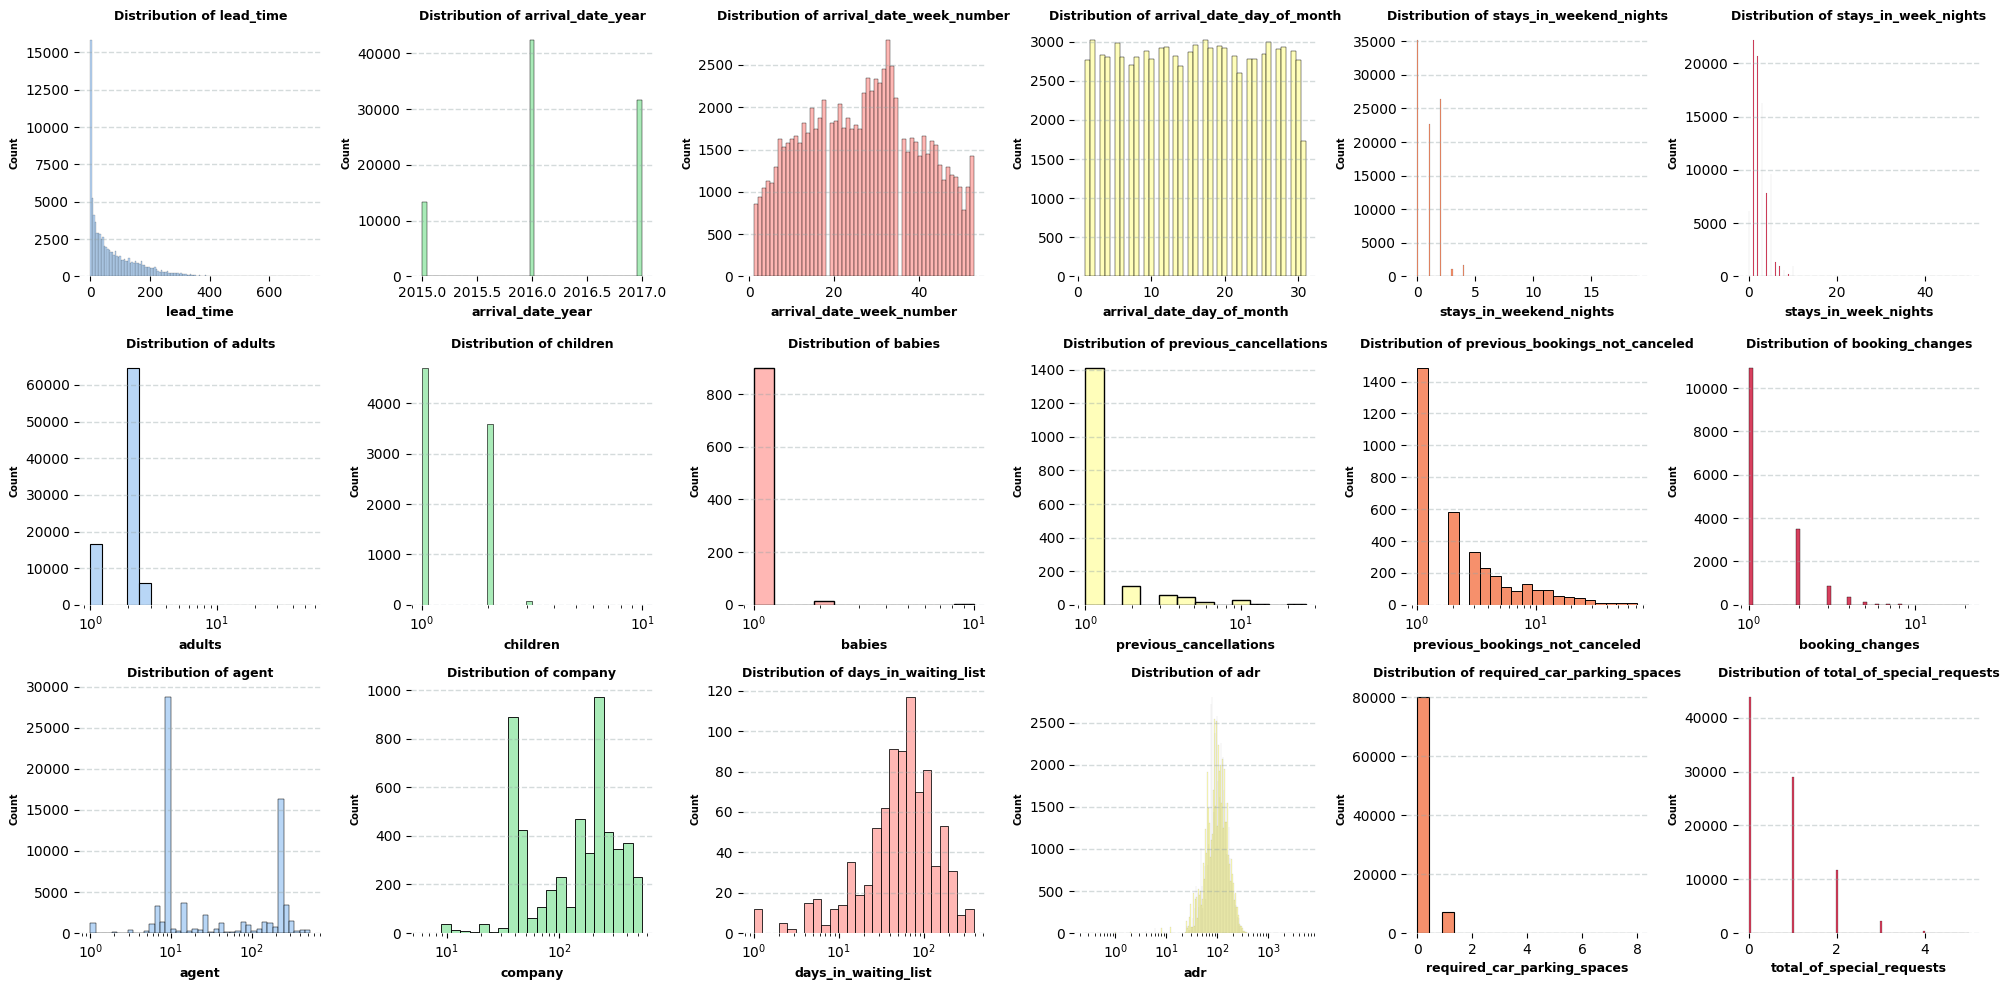

In [13]:
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#fffea3', '#f36b3b','#CC0028']
nrows=3
ncols=6
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20, 10))

cols = ['lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']
for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c
        if i < len(cols):
            ax_i = ax[r,c]
            if i in [6,7,8,9,10,11,12,13,14,15]:
                p = sns.histplot(data=hotel_df[cols[i]], ax=ax_i, log_scale=True, color=color[np.mod(i,6)])
            else:
                p = sns.histplot(data=hotel_df[cols[i]], ax=ax_i,color=color[np.mod(i,6)])
            p.axes.set_title(f"Distribution of {cols[i]}",fontsize=9, color='k', weight='bold')
            p.axes.set_xlabel(f"{cols[i]}",fontsize=9, weight='bold')
            p.axes.set_ylabel('Count',fontsize=7, weight='bold')
            p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.tight_layout()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

- Biểu đồ thể hiện phân bố của các biến số như `lead_time`, `arrival_date_year`, `arrival_date_week_number`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `agent`, `company`, `days_in_waiting_list`, `adr`, `required_car_parking_spaces`, và `total_of_special_requests`.
- `lead_time` có phân bố lệch phải, nhiều đặt phòng được thực hiện trong một khoảng thời gian ngắn trước khi đến, nhưng cũng có những đặt phòng được thực hiện rất sớm.
- `arrival_date_year` cho thấy phân bố đồng đều giữa các năm, với một số biến động nhỏ.
- `arrival_date_week_number` và `arrival_date_day_of_month` cho thấy sự phân bố khá đều, với một số tuần hoặc ngày có số lượng đặt phòng cao hơn.
- Biểu đồ của `stays_in_weekend_nights` và `stays_in_week_nights` cho thấy phần lớn các lưu trú tập trung vào khoảng thấp, với ít lưu trú kéo dài hơn.
- Số lượng `adults` trong các đặt phòng thường cao hơn so với `children` và `babies`.
- Có ít `previous_cancellations` và `previous_bookings_not_canceled`, điều này cho thấy khách hàng có xu hướng không thay đổi đặt phòng của họ nhiều lần.
- `booking_changes` có xu hướng thấp, với phần lớn đặt phòng không có thay đổi.
- Số lượng đặt phòng thông qua `agent` cao hơn nhiều so với `company`, cho thấy sự ưu tiên sử dụng đại lý du lịch.
- `days_in_waiting_list` thấp, chỉ ra rằng hầu hết đặt phòng được xác nhận mà không cần phải chờ đợi lâu.
- `adr` có phân bố rộng, phản ánh sự đa dạng về giá phòng.
- `required_car_parking_spaces` và `total_of_special_requests` thấp, cho thấy chúng không phải là yêu cầu phổ biến khi đặt phòng.

**Insight từ bảng biểu:**
- Các nhà cung cấp dịch vụ lưu trú có thể tập trung vào việc tối ưu hóa quá trình đặt phòng để xử lý đặt phòng sớm, cũng như cung cấp ưu đãi cho các đặt phòng sớm.
- Sự phân bố của `stays_in_weekend_nights` và `stays_in_week_nights` cho thấy cơ hội để cung cấp các gói cước cho ngắn hạn hoặc cuối tuần.
- Mối quan hệ giữa số lượng `booking_changes` thấp và ít `days_in_waiting_list` cho thấy một quy trình đặt phòng hiệu quả và nhanh chóng, điều này có thể là điểm mạnh để quảng cáo.
- Sự ưu tiên của `agent` so với `company` trong việc đặt phòng có thể chỉ ra một kênh phân phối chính cần tập trung phát triển thêm.

<a class = "anchor" id = "2.1"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>2.2 Phân phối dữ liệu không phải kiểu số (Category)</center></span>**

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#FFF0EB   ;
           font-size:110%;
            text-align: left;
            text: black">
            
Đối với các cột có kiểu dữ liệu không phải là số, ta sẽ tính:
- Tỷ lệ giá trị bị thiếu [`Missing_ratio`]
- Số lượng giá trị duy nhất trong mỗi cột [`Num_diff_vals`]
- Phân phối từng cột (số lần xuất hiện của từng giá trị duy nhất) [`Distribution`]

In [14]:
str_col_name = cate_cols.copy()
str_col_dist_df = pd.DataFrame(columns=str_col_name,
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

str_col_dist_df.loc['Num_diff_vals'] = hotel_df[str_col_dist_df.columns].nunique()
str_col_dist_df.loc['Distribution'] = hotel_df[str_col_dist_df.columns].apply(lambda col: col.value_counts().to_dict())
str_col_dist_df.loc['Missing_ratio'] = (hotel_df[str_col_name] == '').sum() / hotel_df.shape[0] * 100
str_col_dist_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
Missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Num_diff_vals,2,12,5,178,8,5,10,12,3,4,3,926
Distribution,"{'City Hotel': 53428, 'Resort Hotel': 33968}","{'August': 11257, 'July': 10057, 'May': 8355, ...","{'BB': 67978, 'SC': 9481, 'HB': 9085, 'Undefin...","{'PRT': 27453, 'GBR': 10433, 'FRA': 8837, 'ESP...","{'Online TA': 51618, 'Offline TA/TO': 13889, '...","{'TA/TO': 69141, 'Direct': 12988, 'Corporate':...","{'A': 56552, 'D': 17398, 'E': 6049, 'F': 2823,...","{'A': 46313, 'D': 22432, 'E': 7195, 'F': 3627,...","{'No Deposit': 86251, 'Non Refund': 1038, 'Ref...","{'Transient': 71986, 'Transient-Party': 11727,...","{'Check-Out': 63371, 'Canceled': 23011, 'No-Sh...","{'2/14/2016': 211, '5/25/2017': 205, '10/21/20..."


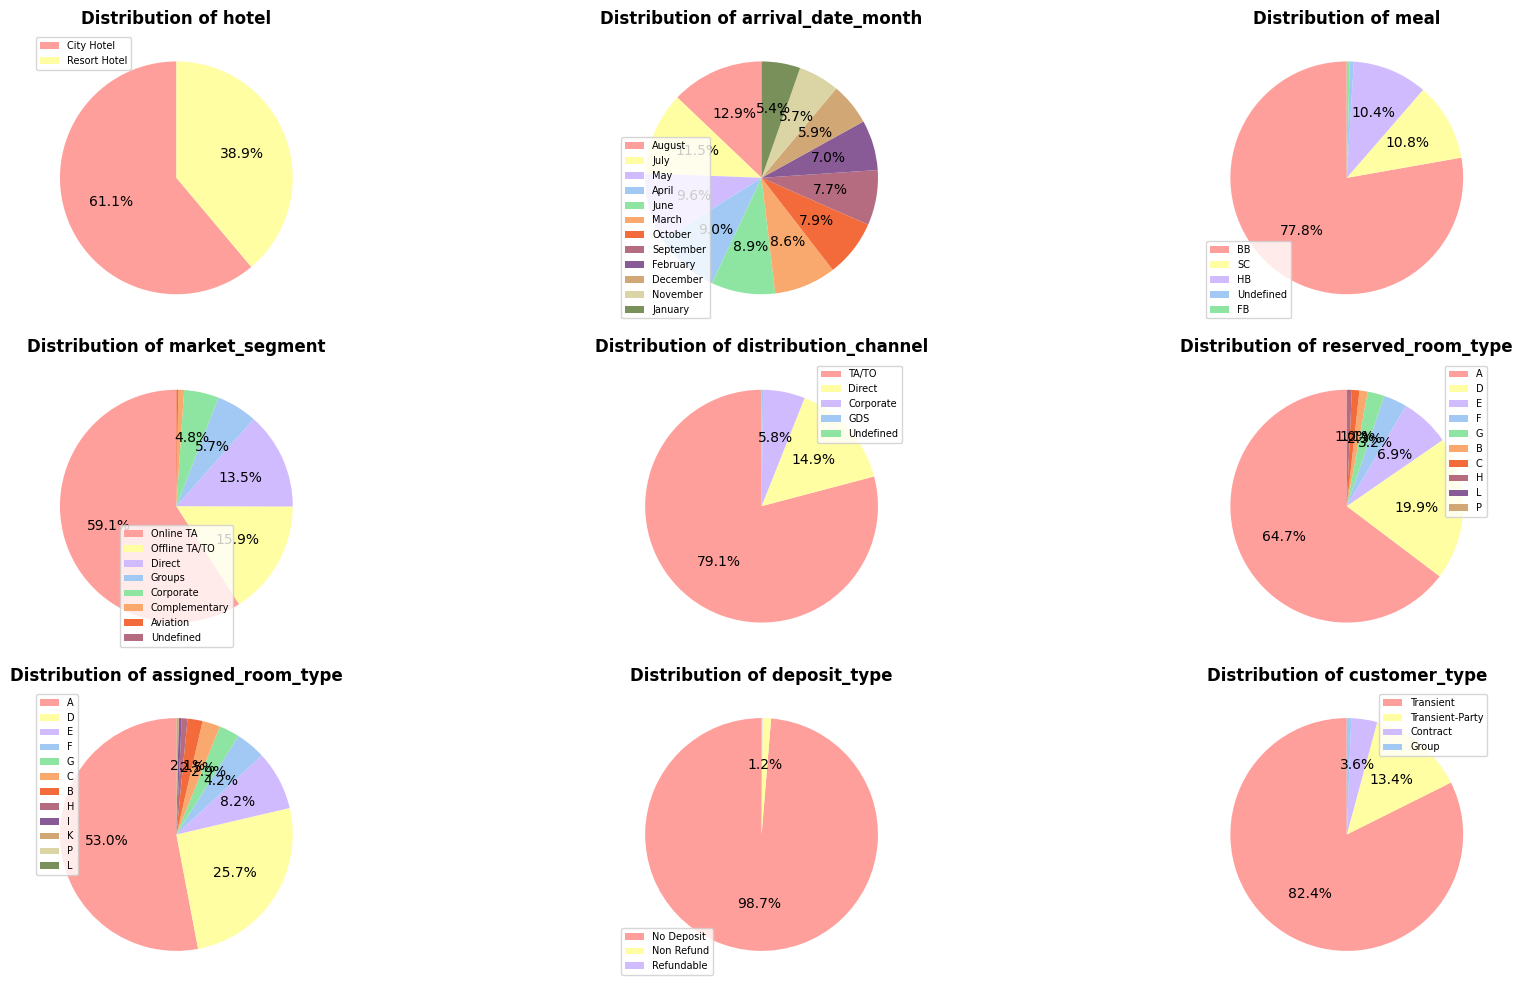

In [15]:
colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1',"#faa96e","#f36b3b", '#B66C80', '#895B96', '#D1A776', '#DBD4A4', '#7A905B']
nrows=3
ncols=3

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
cols = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status']
type_counts = hotel_df[cols].value_counts()
for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c
        if i < len(cols):
            type_counts = hotel_df[cols[i]].value_counts()
            ax_i = ax[r,c]
            ax_i.pie(type_counts,autopct=lambda pct: f'{pct:.1f}%' if pct >= 1 else '',startangle=90,colors=colors) 
            ax_i.set_title(f'Distribution of {cols[i]}', fontsize=12, weight='bold')
            if i == 1:
                ax_i.legend(type_counts.index,fontsize=7,loc='lower left')
            else:
                ax_i.legend(type_counts.index,fontsize=7,loc='best')

sns.despine(left=True, bottom=True)
plt.tight_layout()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

- `Distribution of hotel`: Phần lớn đặt phòng là tại `City Hotel` (61.1%) so với `Resort Hotel` (38.9%).

- `Distribution of arrival_date_month`: Tháng có lượng đặt phòng cao nhất là tháng 8 (12.9%), theo sau là tháng 7 (12.7%). Các tháng có lượng đặt phòng thấp nhất là tháng 1 và tháng 11 (cả hai đều là 5.9%).

- `Distribution of meal`: Phần lớn khách hàng chọn bữa ăn `BB` (Bed & Breakfast) với 77.8%, trong khi các tùy chọn khác như `SC`, `HB`, `FB` và `Undefined` chiếm một tỷ lệ nhỏ hơn nhiều.

- `Distribution of market_segment`: `Online TA` chiếm phần lớn phân khúc thị trường với 59.1%, tiếp theo là các phân khúc như `Offline TA/TO`", `Direct`, và `Groups`.

- `Distribution of distribution_channel`: `TA/TO` là kênh phân phối chính, chiếm 79.1% thị phần, với `Direct` và `Corporate` là những kênh khác nhau chiếm một phần nhỏ.

- `Distribution of reserved_room_type`: Loại phòng được đặt nhiều nhất là loại `A` với 64.7%, sau đó là loại `D` và `E` với tỷ lệ đáng kể.

- `Distribution of assigned_room_type`: Khi đã được phân công, loại phòng `A` vẫn chiếm ưu thế với 53.0%, còn `D` và `E` cũng chiếm tỷ lệ lớn.

- `Distribution of deposit_type`: Gần như tất cả các đặt phòng không yêu cầu tiền đặt cọc (`No Deposit` 98.7%), trong khi `Non Refund` và `Refundable` chiếm một tỷ lệ rất nhỏ.

- `Distribution of customer_type`: Đa số khách hàng thuộc loại `Transient` (82.4%), với một tỷ lệ nhỏ hơn thuộc về `Transient-Party`, `Contract`, và `Group`.

Những thông tin này cho thấy xu hướng và sở thích của khách hàng khi đặt phòng khách sạn, cũng như thông tin về cách thức họ tiếp cận và đặt phòng. Bữa ăn Bed & Breakfast và loại phòng "A" dường như là lựa chọn phổ biến, và hầu hết khách hàng đặt phòng thông qua các kênh trực tuyến và không yêu cầu tiền đặt cọc.

<a id="3"></a>
## <div style="text-align: left; background-color:#F2D6AE ; font-family: Times New Roman;  color: #B56C60; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: #B56C60;">3. EDA 2D 📚</div> 

<a class = "anchor" id = "3.1"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>3.1. Phân tích hệ số tương quan giữa các cột số</center></span>**

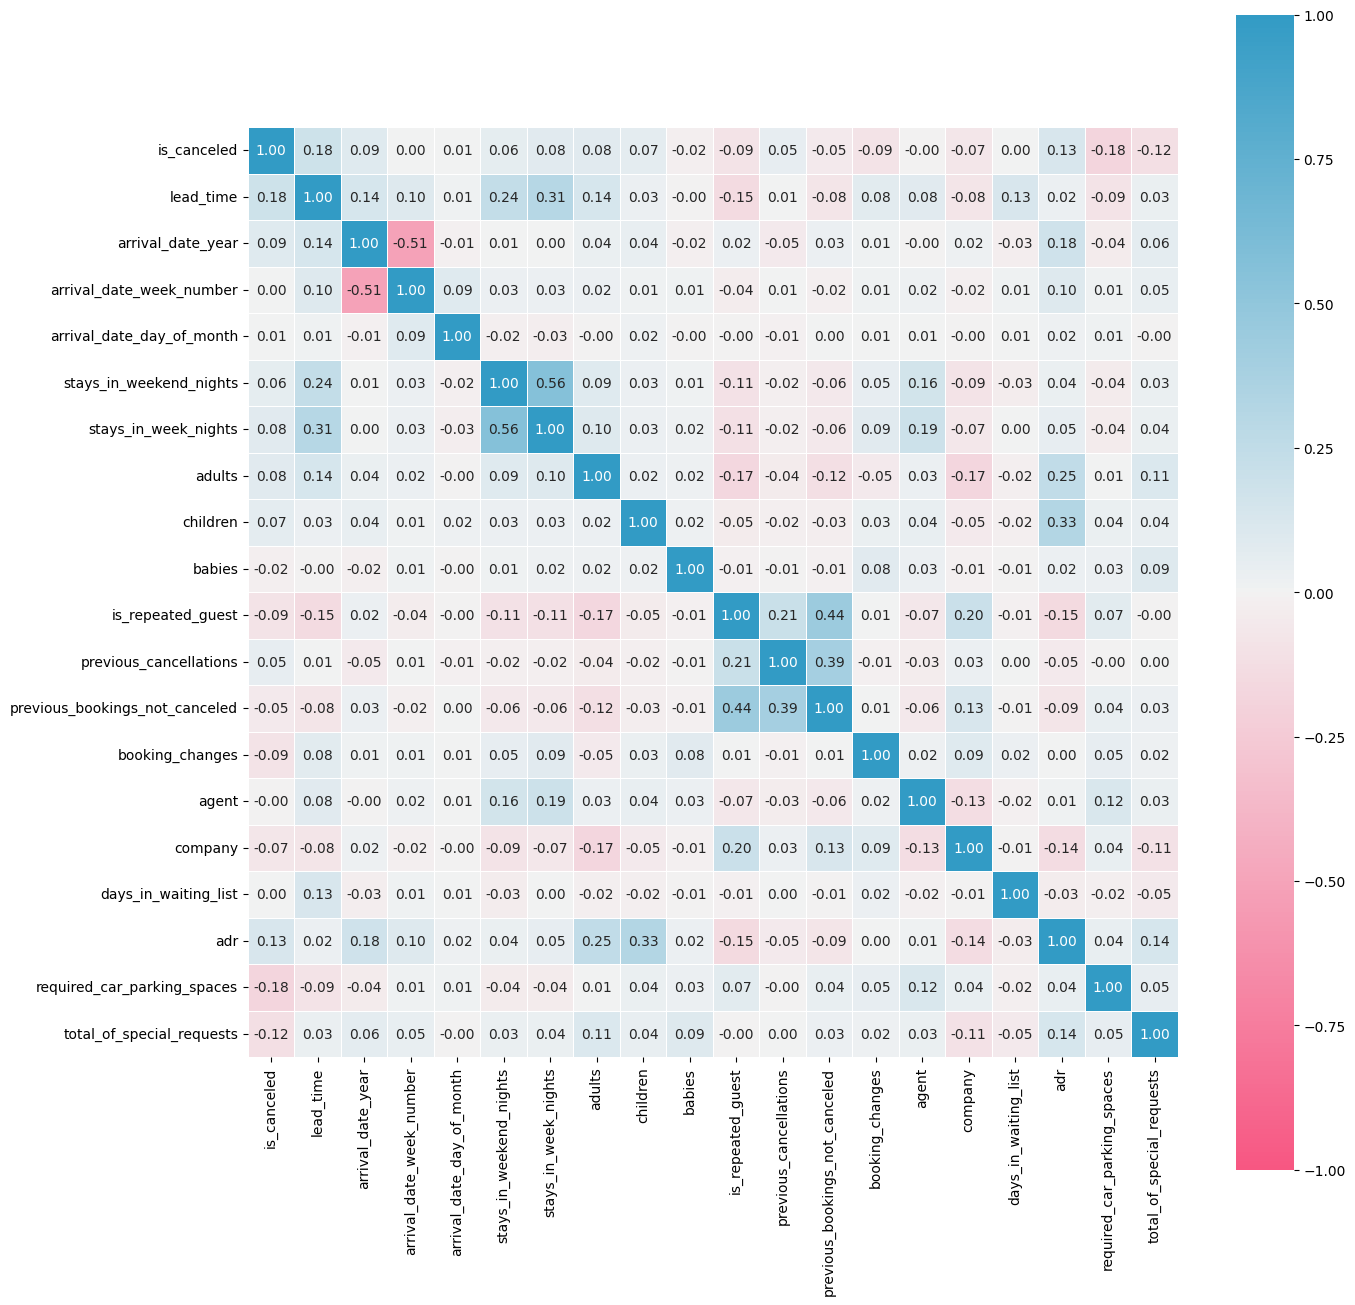

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
ax = sns.heatmap(hotel_df[numeric_cols].corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap=cmap, vmin=-1, vmax=1)

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

- `lead_time` và `is_canceled` có tương quan tích cực mạnh (0.24), cho thấy thời gian từ khi đặt đến ngày đến càng lâu, khả năng hủy đặt phòng càng cao.
- `total_of_special_requests` có tương quan tiêu cực với `is_canceled` (-0.23), điều này có thể chỉ ra rằng càng nhiều yêu cầu đặc biệt được đưa ra, khả năng khách hàng sẽ không hủy đặt phòng.
- `previous_cancellations` có tương quan tích cực với `is_canceled` (0.11), nghĩa là khách hàng đã từng hủy bỏ đặt phòng trước đây có nhiều khả năng sẽ hủy lại.
- `booking_changes` có tương quan tiêu cực nhẹ với `is_canceled` (-0.14), có thể cho thấy những đặt phòng có thay đổi ít có khả năng hủy hơn.
- `adr` (Average Daily Rate) có một mức độ tương quan tích cực với `adults` (0.23) và `children` (0.33), cho thấy giá phòng trung bình cao hơn khi có trẻ em và người lớn trong đặt phòng.
- `arrival_date_year` và `adr` cũng có một tương quan tiêu cực (-0.14), có thể chỉ ra rằng giá phòng trung bình giảm qua các năm.
- `company` và `days_in_waiting_list` có tương quan tích cực (0.13), có thể cho thấy các đặt phòng từ các công ty cụ thể có thể phải đợi lâu hơn để được xác nhận.

<a class = "anchor" id = "2.1"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>3.2 Phân tích dữ liệu bằng Scatter Plot cho 2 biến Numerical</center></span>**

<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích cột `booking_changes` và `days_in_waiting_list`** 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12944\4075251871.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data=hotel_df, x="booking_changes", y="days_in_waiting_list", palette=['#046582', '#F39189'])


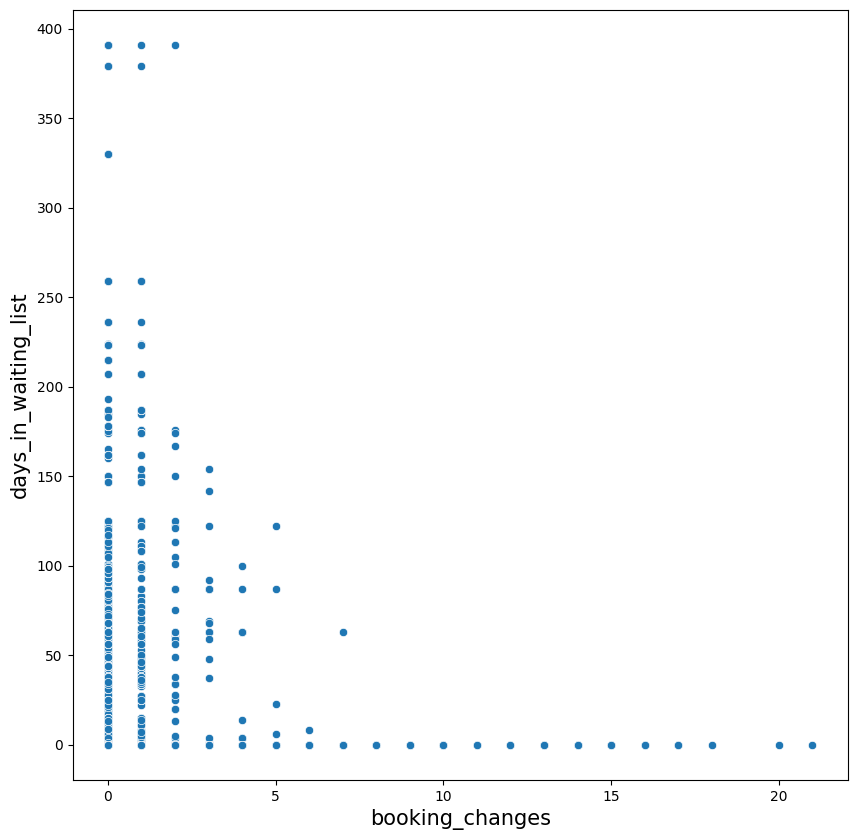

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=hotel_df, x="booking_changes", y="days_in_waiting_list", palette=['#046582', '#F39189'])
plt.xlabel('booking_changes', size = 15)
plt.ylabel('days_in_waiting_list', size = 15)
plt.show()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">
            
Biểu đồ phân tán này mô tả mối quan hệ giữa số lần thay đổi đặt phòng (`booking_changes`) trên trục hoành và số ngày ở trong danh sách chờ (`days_in_waiting_list`) trên trục tung.
- Có thể thấy rằng đa số các điểm dữ liệu tập trung ở phía dưới của biểu đồ, cho thấy rằng đa số các đặt phòng không phải chờ đợi quá lâu trước khi được xác nhận hoặc chỉ thực hiện một số ít thay đổi.
- Một lượng nhỏ đặt phòng có số lượng thay đổi nhiều hơn, nhưng số ngày chờ đợi dường như không tăng đáng kể với số lượng thay đổi.
- Một số điểm dữ liệu với số ngày chờ đợi cao bất thường không có quá nhiều thay đổi đặt phòng, điều này cho thấy có thể có những yếu tố khác ảnh hưởng đến thời gian chờ đợi ngoài số lần thay đổi đặt phòng.

**Insight từ biểu đồ:**
- Khách hàng có vẻ như không thường xuyên thay đổi đặt phòng của họ, hoặc khi có thay đổi, không đòi hỏi phải chờ đợi thêm.
- Điều này cũng có thể chỉ ra rằng hệ thống quản lý đặt phòng khá hiệu quả trong việc xử lý các thay đổi mà không làm tăng thời gian chờ đợi.
- Tuy nhiên, có một số ít trường hợp khách hàng phải chờ đợi một thời gian dài mà không rõ nguyên nhân, có thể là do sự chậm trễ trong quản lý hoặc do yếu tố bên ngoài như sự chờ đợi phòng trống hoặc xác nhận từ bên thứ ba.
- Các nhà cung cấp dịch vụ có thể cần phải xem xét lại quy trình xử lý đặt phòng của họ để giảm thiểu thời gian chờ đợi, đặc biệt là trong những trường hợp khách hàng phải chờ đợi quá lâu.


<h2 style="color:#498059 ;font-size: 1em "><b>

👉 **Phân tích cột `stays_in_weekend_nights` và `stays_in_week_nights`** 

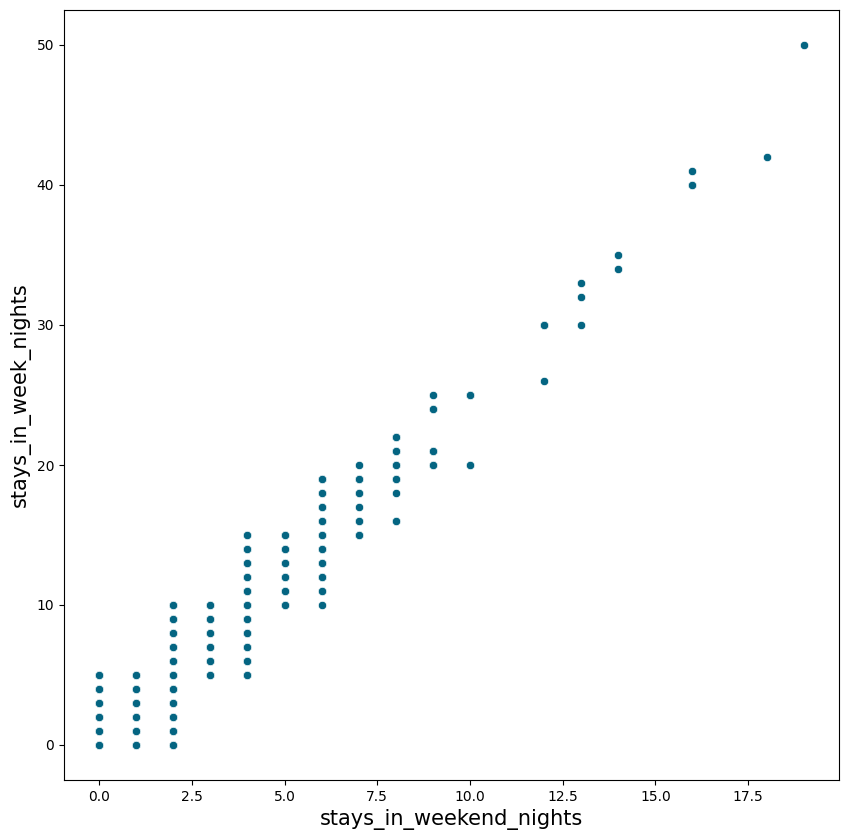

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=hotel_df, x="stays_in_weekend_nights", y="stays_in_week_nights", color=['#046582'])
plt.xlabel('stays_in_weekend_nights', size = 15)
plt.ylabel('stays_in_week_nights', size = 15)
plt.show()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">
            
Biểu đồ phân tán này cho thấy mối quan hệ giữa số đêm lưu trú trong cuối tuần (`stays_in_weekend_nights`) trên trục hoành và số đêm lưu trú trong tuần (`stays_in_week_nights`) trên trục tung.
- Có vẻ như có một xu hướng tăng: khi số đêm lưu trú vào cuối tuần tăng thì số đêm lưu trú vào ngày trong tuần cũng tăng.
- Hầu hết các điểm dữ liệu tập trung vào khoảng thấp của cả hai trục, cho thấy rằng phần lớn các lưu trú không vượt quá 10 đêm cho cả cuối tuần lẫn ngày trong tuần.
- Tuy nhiên, có một số điểm dữ liệu nằm xa vùng tập trung chính, cho thấy một số lưu trú kéo dài đáng kể hơn, với số đêm lên đến 50 cho ngày trong tuần.
- Sự phân tán của dữ liệu có thể chỉ ra sự đa dạng trong mục đích lưu trú, từ ngắn hạn đến dài hạn.

**Insight từ biểu đồ:**
- Sự phân bố dữ liệu cho thấy rằng có một số lượng lớn khách lưu trú ngắn hạn, điều này phản ánh nhu cầu lớn đối với các chuyến đi ngắn ngày hoặc cuối tuần.
- Các điểm dữ liệu với số đêm lưu trú lớn có thể đến từ khách hàng làm việc dự án, di chuyển công tác dài hạn, hoặc các gia đình trong kỳ nghỉ dài.
- Các nhà cung cấp dịch vụ lưu trú nên cân nhắc cung cấp các gói dịch vụ phong phú để đáp ứng nhu cầu của cả khách lưu trú ngắn hạn và dài hạn, cũng như xem xét định giá linh hoạt dựa trên độ dài lưu trú.


<a class = "anchor" id = "2.1"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>3.3 Phân tích dữ liệu bằng Bar Chart cho biến Numerical và Category</center></span>**

<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích cột `customer_type` và `days_in_waiting_list`** 

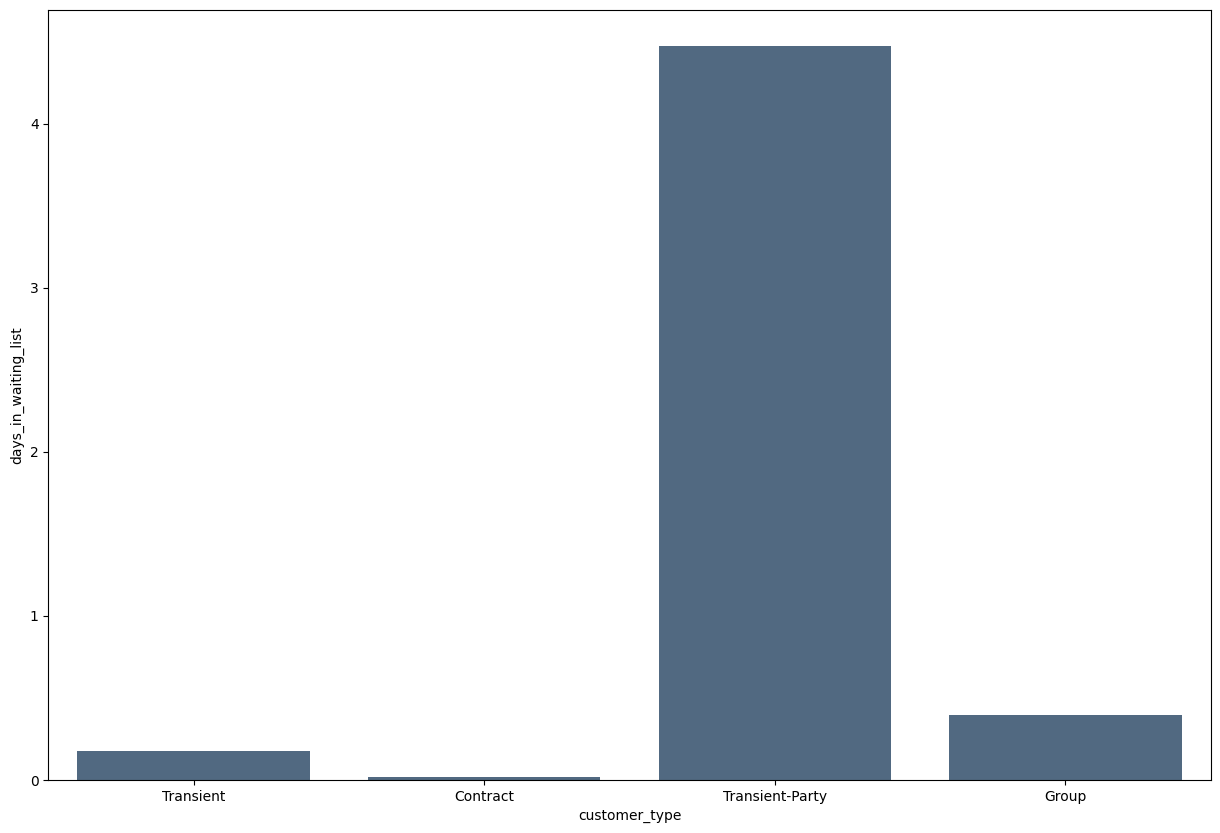

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(data=hotel_df, x='customer_type', y='days_in_waiting_list',errorbar=None, color='#496989');

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">
            
- Nhìn chung, những khách hàng loại `Transient-Party` có thời gian chờ đợi trong danh sách chờ lâu nhất. `Transient-Party` thường bao gồm các nhóm du lịch nhỏ hoặc nhóm người đi công tác. Vì vậy, số lượng phòng cần đặt cho nhóm này có thể lớn hơn so với các nhóm khách hàng khác, dẫn đến việc phải đợi lâu hơn trong danh sách chờ để có được các phòng.
- Khách hàng đến khách sạn để làm ăn thì sẽ được khách sạn ưu tiên xét duyệt phòng và nằm trong danh sách chờ ngắn nhất. Trung bình thường chưa đến 1 ngày đã đặt được phòng trong khi khách `Transient-Party` phải chờ đến hơn 4 ngày. Khách hàng đến để làm ăn thường có nhu cầu ở lại khách sạn trong thời gian ngắn và không phải chờ đợi lâu để có phòng. Điều này có thể do họ có lịch trình linh hoạt hoặc cần phải đặt phòng gấp.

<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích cột `customer_type` và `stays_in_week_nights`** 

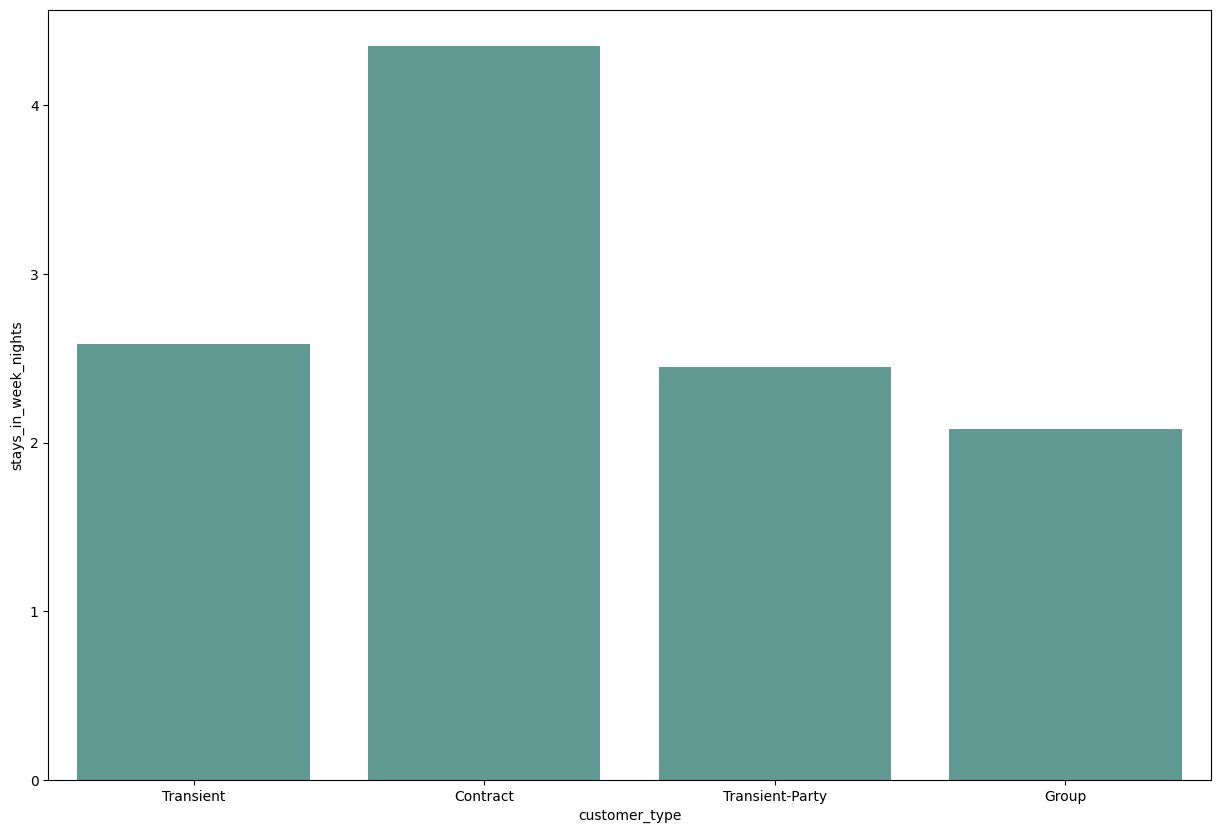

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(data=hotel_df, x='customer_type', y='stays_in_week_nights',errorbar=None, color = '#58A399');

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

- Khách hàng loại `Contract` có xu hướng lưu trú nhiều đêm trong tuần nhất, với hơn 4 đêm. Điều này có thể là do họ thường xuyên đi công tác và cần một nơi ở trong suốt tuần làm việc.
- `Transient` và `Group` có số đêm lưu trú ít hơn, với khoảng 2 và gần 3 đêm tương ứng. Có thể khách hàng loại này chủ yếu đi du lịch ngắn hạn hoặc không yêu cầu lưu trú dài lâu.
- Khách hàng loại `Transient Party` cũng có xu hướng lưu trú khoảng gần 3 đêm, cho thấy rằng nhóm này có thể bao gồm các nhóm du lịch hoặc người đi công tác nhỏ.

Tóm lại, việc hiểu rõ về loại khách hàng và thời gian lưu trú của họ có thể giúp quản lý khách sạn đưa ra quyết định hiệu quả về phân bổ phòng và quản lý danh sách chờ.

<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích cột `arrival_date_month` và `lead_time`** 

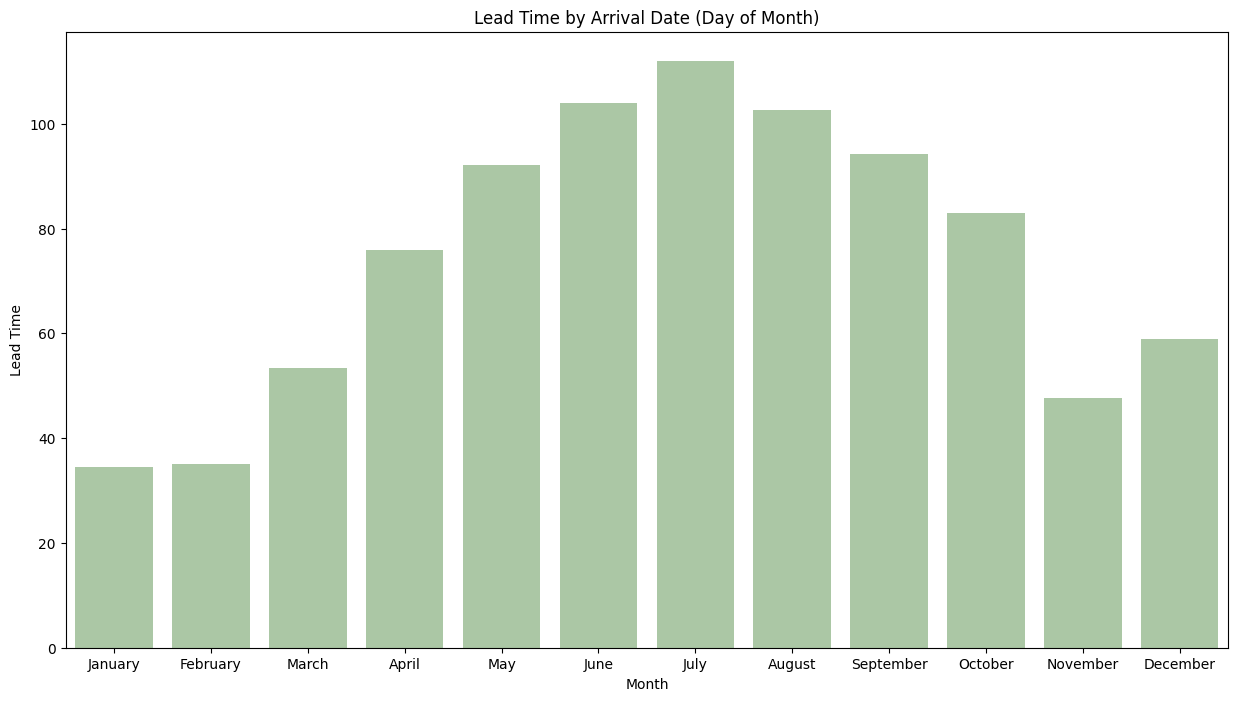

In [21]:
# Tạo biểu đồ cột
plt.figure(figsize=(15, 8))
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=hotel_df, x='arrival_date_month', y='lead_time', order=months_order,errorbar=None, color='#A8CD9F')

# Đặt tiêu đề và nhãn trục
plt.title('Lead Time by Arrival Date (Day of Month)')
plt.xlabel('Month')
plt.ylabel('Lead Time')

# Hiển thị biểu đồ
plt.show()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

Nhìn chung, có xu hướng rằng từ tháng 4 đến tháng 10, khách hàng thường đặt phòng trước ít nhất 2 tháng để đảm bảo có phòng khi đến khách sạn. Điều này có thể chỉ ra rằng trong khoảng thời gian này là thời điểm cao điểm và có thể có tình trạng hết phòng do nhu cầu đặt phòng tăng lên, khiến mọi người thường phải đặt trước.

Đặc biệt, trong các tháng 6, 7 và 8, thời gian đặt phòng trước thường là 3 tháng. Điều này có thể được lí giải bằng sự phổ biến của mùa du lịch hè và nhu cầu lưu trú cao trong thời gian này. Khách hàng thường muốn đảm bảo có phòng ở những điểm du lịch phổ biến và các kỳ nghỉ hè, do đó họ thường đặt phòng trước ít nhất 3 tháng để đảm bảo có chỗ ở khi đến.

Như vậy, từ các quan sát trên, có thể kết luận rằng việc đặt phòng trước từ 2 đến 3 tháng trong các tháng cao điểm là một thói quen phổ biến của khách hàng để đảm bảo có trải nghiệm lưu trú tốt nhất và tránh tình trạng hết phòng.

<a class = "anchor" id = "2.4"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>2.4 Tính tỷ trọng đối với hai biến Category</center></span>**

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#FFF0EB   ;
           font-size:110%;
            text-align: left;
            text: black">

Trong tập dữ liệu, cột **`arrival_date_year`** ban đầu có kiểu dữ liệu số (numerical), tuy nhiên theo ý nghĩa của cột, nó biểu thị cho thông tin về năm, nên ta có thể xem nó như một biến dạng category.

<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích tỷ trọng khách đặt khách sạn theo mùa của từng năm**

In [22]:
df = hotel_df.copy()
# Tạo một bản đồ ánh xạ từ tên tháng sang số tháng
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Áp dụng bản đồ ánh xạ để chuyển đổi cột 'arrival_date_month' thành giá trị số
df['Month'] = df['arrival_date_month'].map(month_to_number)

# Gộp các tháng thành mùa
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
df['Season'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=seasons, include_lowest=True)

booking_per_season = df.groupby(['arrival_date_year', 'Season']).size().reset_index(name='Count')
booking_per_season['Percentage'] = booking_per_season['Count'] / booking_per_season.groupby('arrival_date_year')['Count'].transform('sum') * 100

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12944\203108642.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_per_season = df.groupby(['arrival_date_year', 'Season']).size().reset_index(name='Count')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12944\2584333492.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_per_season.groupby(['arrival_date_year', 'Season'])['Percentage'].sum().unstack().plot(kind='area', stacked=True, ax=ax)


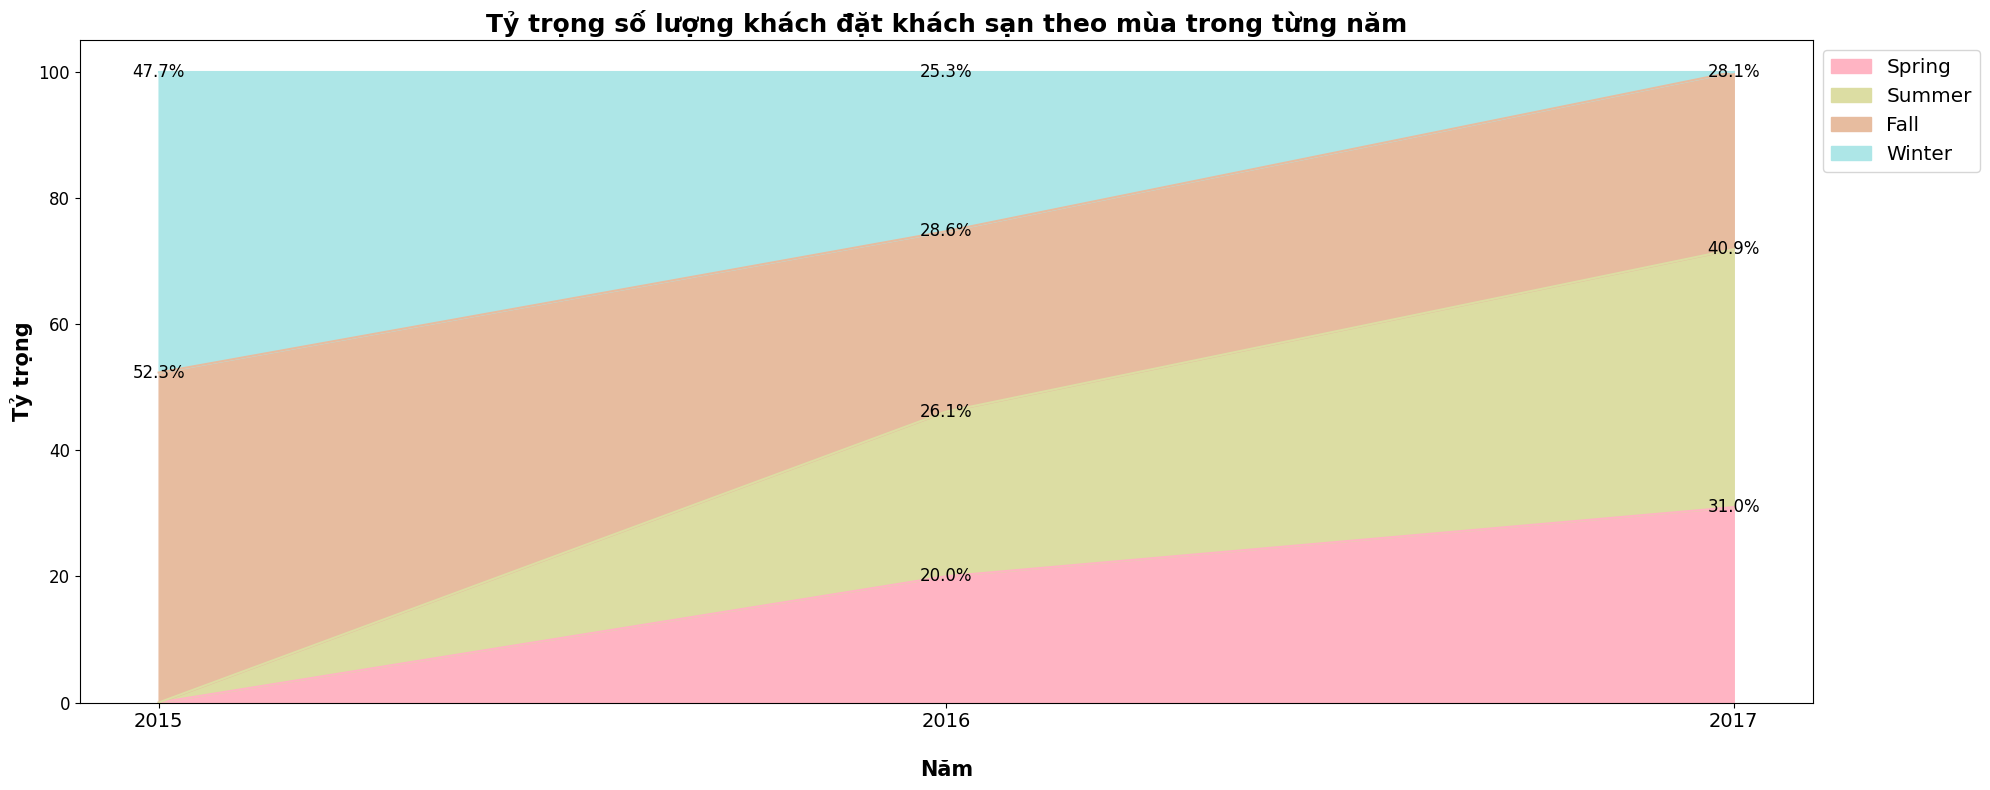

In [23]:
# Đặt màu cho từng mùa
season_palette = {
    'Spring': '#ffb4c3',
    'Summer': '#dcdda3',
    'Autumn': '#e7bc9f',
    'Winter': '#ade6e7'
}

# Đặt mặc định palette cho Seaborn
sns.set_palette(season_palette.values())

# Tạo subplot và đặt kích thước
fig, ax = plt.subplots(figsize=(20, 8))

# Vẽ biểu đồ diện tích
booking_per_season.groupby(['arrival_date_year', 'Season'])['Percentage'].sum().unstack().plot(kind='area', stacked=True, ax=ax)

# Đặt tiêu đề và nhãn cho trục x và trục y
ax.set_title('Tỷ trọng số lượng khách đặt khách sạn theo mùa trong từng năm', fontsize=18, weight='bold')
ax.set_xlabel('\nNăm', fontsize=15, weight='bold')
ax.set_ylabel('Tỷ trọng', fontsize=15, weight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1, 0, 0), fontsize='x-large')
ax.set_xticks(range(2015,2018,1))
# Đặt kích thước của nhãn trục x
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=12)

# Đặt các điểm chú thích trên biểu đồ
for year, row in booking_per_season.groupby('arrival_date_year'):
    if year in ax.get_xticks():
        temp = 0
        for season, percentage in row.set_index('Season')['Percentage'].items():
            x_pos = year
            temp += percentage
            y_pos = temp
            if percentage > 0:  # Kiểm tra nếu tỷ trọng > 0% thì mới hiển thị số trên biểu đồ 
                ax.text(x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
sns.reset_defaults()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">


- Xét năm 2015:
  + Chỉ có tỷ trọng của mùa Thu và mùa Đông xuất hiện vì có thể dữ liệu được thu thập từ mùa Thu nên mùa Xuân và Hè không có dữ liệu
  + Tỷ trọng đặt phòng vào mùa Thu cao hơn mùa Đông khoảng năm 5%
  + Có thể thấy, năm 2015, mùa Thu là mùa có đông khách đến khách sạn nhất

- Xét năm 2016:
  + Tỷ trọng của 4 mùa trong năm này phân bố khá đều
  + Tỷ trọng khách đặt khách sạn vào mùa Thu vẫn là cao nhất và theo sau khá sát là mùa Hè
  + Mùa Thu và mùa Hè là mùa cao điểm của khách sạn vào năm này

- Xét năm 2017:
  + Không có tỷ trọng mùa Đông trong năm này vì có thể dữ liệu thu thập đến trước đó thì dừng nên không có dữ liệu
  + Tỷ trọng khách vào mùa Hè tăng hơn 10% trong năm này và dẫn đầu
  + Tỷ trọng khách vào mùa Xuân cũng khá cao hơn 10% và xếp sau mùa Hè
  + Trong khi đó tỷ trọng mùa Thu lại vẫn giữ nguyên và không tăng đáng kể

Nhìn chung thì mùa hè và mùa thu có xu hướng là mùa cao điểm và lượng khách đến khách sạn khá cao trong 3 năm khảo sát phòng và tình trạng phòng.

<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích cột `arrival_date_year` và `arrival_date_month`**

In [24]:
hotel_df.groupby(['arrival_date_year', 'arrival_date_month' ]).agg({'arrival_date_month': 'count'})/len(hotel_df)

arrival_date_month
arrival_date_year arrival_date_month                    
2015              August                        0.028068
                  December                      0.022678
                  July                          0.019154
                  November                      0.019051
                  October                       0.030894
                  September                     0.032484
2016              April                         0.043137
                  August                        0.050609
                  December                      0.036031
                  February                      0.032107
                  January                       0.021157
                  July                          0.044064
                  June                          0.040242
                  March                         0.043835
                  May                           0.043251
                  November                      0.038102
                  October                       0.048446
                  September                     0.044064
2017              April                         0.047348
                  August                        0.050128
                  February                      0.037668
                  January                       0.032542
                  July                          0.051856
                  June                          0.048606
                  March                         0.042130
                  May                           0.052348

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

Bảng dữ liệu này cung cấp thông tin về tỷ lệ hoặc số lượng đến theo từng tháng trong các năm từ 2015 đến 2017.

- Trong năm **2015**, tháng có tỷ lệ cao nhất là **September** (0.032484), trong khi đó, tháng có tỷ lệ thấp nhất là **July** (0.019154).
- Vào năm **2016**, có sự tăng rõ rệt về tỷ lệ hoặc số lượng đến. Tháng **August** đạt tỷ lệ cao nhất là 0.050609, còn tháng **January** là tháng có tỷ lệ thấp nhất (0.021157).
- Trong **2017**, xu hướng này tiếp tục với tháng **May** đạt tỷ lệ cao nhất là 0.052348, trong khi **February** có tỷ lệ thấp nhất là 0.037668.
- Có thể quan sát rằng, các tháng mùa hè như **July** và **August** thường có tỷ lệ cao, điều này có thể liên quan đến kỳ nghỉ mùa hè hoặc thời tiết thuận lợi cho du lịch và hoạt động ngoài trời.
- Mặt khác, những tháng mùa đông như **January** và **February** thường có tỷ lệ thấp hơn, có thể do điều kiện thời tiết không thuận lợi hoặc ít dịp nghỉ lễ hơn.

<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích cột `customer_type` và `reservation_status`**

In [25]:
hotel_df.groupby(['customer_type', 'reservation_status' ]).agg({'reservation_status': 'count'})/len(hotel_df)

reservation_status
customer_type   reservation_status                    
Contract        Canceled                      0.005572
                Check-Out                     0.030059
                No-Show                       0.000286
Group           Canceled                      0.000572
                Check-Out                     0.005607
                No-Show                       0.000046
Transient       Canceled                      0.238089
                Check-Out                     0.575701
                No-Show                       0.009886
Transient-Party Canceled                      0.019063
                Check-Out                     0.113735
                No-Show                       0.001385

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

- Bảng dữ liệu phân tích mối quan hệ giữa `customer_type` và `reservation_status`, bao gồm các trạng thái như *Canceled*, *Check-Out*, và *No-Show*.
- Đối với khách hàng loại **Contract**:
  - Tỷ lệ hủy đặt phòng là 0.005572.
  - Tỷ lệ trả phòng (Check-Out) là 0.030059.
  - Tỷ lệ không đến (No-Show) là 0.000286.
- Đối với nhóm khách hàng **Group**:
  - Tỷ lệ hủy đặt phòng là 0.000572.
  - Tỷ lệ trả phòng là 0.005607.
  - Tỷ lệ không đến là 0.000046.
- Đối với khách hàng loại **Transient**:
  - Tỷ lệ hủy đặt phòng đáng kể là 0.238089.
  - Tỷ lệ trả phòng cao nhất là 0.575701.
  - Tỷ lệ không đến là 0.009886.
- Đối với khách hàng loại **Transient-Party**:
  - Tỷ lệ hủy đặt phòng là 0.019063.
  - Tỷ lệ trả phòng là 0.113735.
  - Tỷ lệ không đến là 0.001385.
- Có thể thấy rằng, khách hàng loại **Transient** có tỷ lệ hủy và trả phòng cao nhất, điều này có thể chỉ ra rằng họ có kế hoạch du lịch linh hoạt hơn hoặc ít ràng buộc hơn.
- Trong khi đó, khách hàng loại **Contract** có tỷ lệ trả phòng cao nhất so với tỷ lệ hủy và không đến, có thể do các hợp đồng và thỏa thuận trước đó.


<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích cột `customer_type` và `hotel`**

In [26]:
hotel_df.groupby(['customer_type', 'hotel' ]).agg({'hotel': 'count'})/len(hotel_df)

hotel
customer_type   hotel                 
Contract        City Hotel    0.016831
                Resort Hotel  0.019086
Group           City Hotel    0.003101
                Resort Hotel  0.003124
Transient       City Hotel    0.510790
                Resort Hotel  0.312886
Transient-Party City Hotel    0.080610
                Resort Hotel  0.053572

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

Bảng dữ liệu này cung cấp thông tin về sự phân bố của các loại khách hàng (`customer_type`) tại hai loại khách sạn: **City Hotel** và **Resort Hotel**.

- Đối với khách hàng loại **Contract**:
  - Tỷ lệ tại **City Hotel** là 0.016831, trong khi ở **Resort Hotel** là 0.019086.
- Khách hàng nhóm **Group**:
  - Có tỷ lệ tương tự nhau ở cả hai loại khách sạn, với **City Hotel** là 0.003101 và **Resort Hotel** là 0.003124.
- Đối với khách hàng loại **Transient**:
  - Tỷ lệ này đáng chú ý nhất, với **City Hotel** đạt 0.510790 và **Resort Hotel** là 0.312886.
- Khách hàng loại **Transient-Party**:
  - Tỷ lệ tại **City Hotel** là 0.080610, trong khi đó tại **Resort Hotel** là 0.053572.

**Kết luận:**
- Khách hàng loại **Transient** chiếm tỷ lệ cao nhất tại cả hai loại khách sạn, đặc biệt là ở **City Hotel**. Điều này cho thấy nhu cầu lớn từ khách du lịch ngắn hạn hoặc công tác, đặc biệt ở các thành phố lớn.
- **Resort Hotel** hấp dẫn khách hàng **Contract** nhiều hơn so với **City Hotel**, có thể do môi trường yên bình và thích hợp cho nghỉ dưỡng dài hạn.
- Các khách sạn, đặc biệt là **City Hotel**, nên tập trung vào việc cung cấp dịch vụ và tiện ích phù hợp với khách hàng loại **Transient**, như dịch vụ đặt phòng linh hoạt, ưu đãi cho các chuyến đi ngắn ngày, và tiện nghi hiện đại.
- Đối với **Resort Hotel**, việc tạo ra các gói dịch vụ và ưu đãi hấp dẫn cho khách hàng **Contract** có thể là một chiến lược kinh doanh hiệu quả, nhằm thu hút và giữ chân khách hàng dài hạn.

<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích cột `arrival_date_month` và `customer_type`**

In [27]:
hotel_df.groupby(['arrival_date_month', 'customer_type']).agg({'customer_type': 'count'})/len(hotel_df)


customer_type
arrival_date_month customer_type                 
April              Contract              0.001716
                   Group                 0.000366
                   Transient             0.075026
                   Transient-Party       0.013376
August             Contract              0.005664
                   Group                 0.000675
                   Transient             0.109685
                   Transient-Party       0.012781
December           Contract              0.001705
                   Group                 0.000538
                   Transient             0.049316
                   Transient-Party       0.007151
February           Contract              0.000515
                   Group                 0.000549
                   Transient             0.060529
                   Transient-Party       0.008181
January            Contract              0.000240
                   Group                 0.000446
                   Transient             0.045883
                   Transient-Party       0.007128
July               Contract              0.003753
                   Group                 0.000240
                   Transient             0.099719
                   Transient-Party       0.011362
June               Contract              0.003341
                   Group                 0.000412
                   Transient             0.075576
                   Transient-Party       0.009520
March              Contract              0.000618
                   Group                 0.000435
                   Transient             0.072372
                   Transient-Party       0.012541
May                Contract              0.002826
                   Group                 0.000458
                   Transient             0.078287
                   Transient-Party       0.014028
November           Contract              0.002128
                   Group                 0.000584
                   Transient             0.047348
                   Transient-Party       0.007094
October            Contract              0.005984
                   Group                 0.000904
                   Transient             0.056593
                   Transient-Party       0.015859
September          Contract              0.007426
                   Group                 0.000618
                   Transient             0.053343
                   Transient-Party       0.015161

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

Bảng dữ liệu này phân tích mối quan hệ giữa `customer_type` và `arrival_date_month`, bao gồm các loại khách hàng như **Contract**, **Group**, **Transient**, và **Transient-Party** qua các tháng trong năm.

- Trong mọi tháng, `customer_type` **Transient** luôn chiếm tỷ lệ cao nhất, với tỷ lệ đỉnh điểm là 0.109685 trong tháng **August**. Điều này cho thấy sự ưa chuộng của khách hàng dạng này trong việc lựa chọn thời gian nghỉ ngơi.
- `customer_type` **Contract** có tỷ lệ tăng đáng kể trong những tháng như **September** (0.007426) và **October** (0.005984), có thể liên quan đến các hợp đồng dịch vụ được ký kết trong mùa thu.
- Nhóm khách hàng **Group** luôn có tỷ lệ thấp trong suốt cả năm, với tỷ lệ cao nhất là 0.000904 trong tháng **October**.
- `customer_type` **Transient-Party** có tỷ lệ tăng dần từ tháng **May** (0.014028) đến **October** (0.015859), có thể do nhu cầu đi du lịch nhóm tăng trong mùa hè và đầu thu.

Từ bảng dữ liệu, có thể thấy rằng khách hàng loại **Transient** là nhóm chính trong mọi tháng. Do đó, các nhà cung cấp dịch vụ (khách sạn, tour du lịch, v.v.) nên tập trung vào việc tạo ra các gói dịch vụ hấp dẫn cho nhóm này, đặc biệt trong những tháng cao điểm như mùa hè. Đồng thời, việc phát triển các chương trình khuyến mãi và ưu đãi cho khách hàng loại **Contract** trong mùa thu cũng có thể là một hướng đi hấp dẫn, nhằm tăng cường doanh thu trong những tháng có tỷ lệ thấp.


<a id="4"></a>
## <div style="text-align: left; background-color:#F2D6AE ; font-family: Times New Roman;  color: #B56C60; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: #B56C60;">4. EDA 3D 📚</div> 

<a class = "anchor" id = "4.1"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>4.1 Phân tích dữ liệu 3D cho 3 biến Numerical bằng Scatter Plot</center></span>**

<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích 3 biến `lead_time`, `adults` và `adr`**

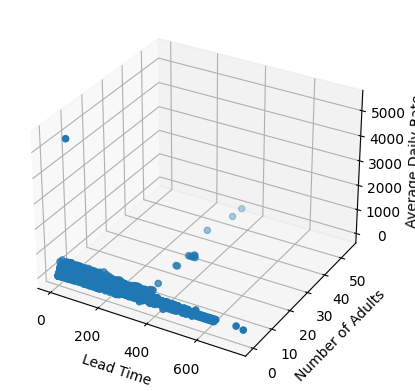

In [28]:
# Tạo scatter plot 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = hotel_df['lead_time']
y = hotel_df['adults']
z = hotel_df['adr']

ax.scatter(x, y, z)
ax.set_xlabel('Lead Time')
ax.set_ylabel('Number of Adults')
ax.set_zlabel('Average Daily Rate')

plt.show()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

- **Thời gian đặt trước `lead_time`**: Đa số các điểm tập trung gần với gốc của trục `lead_time`, cho thấy hầu hết các đặt phòng được thực hiện với thời gian chờ đợi khá ngắn.

- **Số lượng người lớn `adults`**: Hầu hết các đặt phòng được thực hiện cho nhóm người lớn nhỏ, chủ yếu từ 1 đến 2 người lớn mỗi lần đặt phòng. Có rất ít đặt phòng cho nhóm lớn.

- **Giá phòng trung bình `adr`**: 'Giá trung bình hàng ngày' có vẻ thấp cho phần lớn các đặt phòng, với một số điểm ngoại lệ đạt mức giá cao hơn nhiều. Điều này có thể đại diện cho các dịch vụ cao cấp hoặc mức giá mùa cao điểm.

- **Kết hợp các biến**: Không có xu hướng hoặc mô hình rõ ràng từ góc nhìn này kết hợp cả ba biến, điều này gợi ý rằng ba yếu tố này có thể không có mối tương quan trực tiếp mạnh mẽ. Có thể các điểm ngoại lệ với `adr` cao hơn có thể liên quan đến `lead_time` dài hơn, nhưng không thể kết luận một cách chắc chắn mà không cần phân tích thêm.

- **Mật độ dữ liệu và điểm ngoại lệ**: Biểu đồ cho thấy dữ liệu khá dày đặc ở một số khu vực, khiến việc phân biệt giữa các điểm gần nhau trở nên khó khăn. Cũng có một số điểm ngoại lệ rõ ràng, đặc biệt với biến `adr`, có thể đáng được điều tra để hiểu rõ ngữ cảnh của chúng.


<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích 3 biến `stays_in_week_nights`, `adults` và `children`**

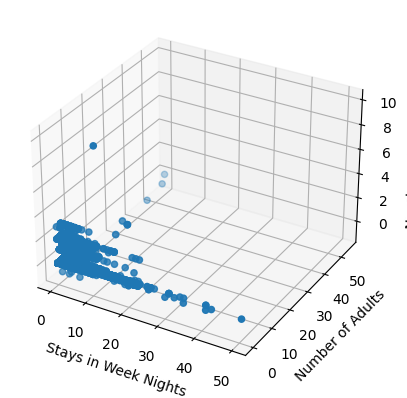

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(hotel_df['stays_in_week_nights'], hotel_df['adults'], hotel_df['children'])

ax.set_xlabel('Stays in Week Nights')
ax.set_ylabel('Number of Adults')
ax.set_zlabel('Number of Children')

plt.show()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

- **Số đêm lưu trú trong tuần `stays_in_week_nights`**: Phần lớn các đặt phòng tập trung vào số đêm từ thấp đến trung bình, cho thấy hầu hết khách hàng có xu hướng ở lại từ vài đêm đến khoảng một tuần.

- **Số lượng người lớn `adults`**: Có vẻ như đa số các đặt phòng được thực hiện cho 1 hoặc 2 người lớn, với rất ít đặt phòng cho những nhóm lớn hơn.

- **Số lượng trẻ em `children`**: Số lượng trẻ em trong các đặt phòng khá thấp, điều này có thể phản ánh xu hướng nghỉ dưỡng của người lớn hoặc các cặp đôi mà không có trẻ em.

- **Kết hợp các biến số**: Không thấy có mối liên hệ rõ ràng giữa số đêm lưu trú, số người lớn, và số trẻ em từ biểu đồ này, điều này cho thấy các yếu tố này độc lập với nhau trong các quyết định đặt phòng.

- **Mật độ và điểm ngoại lệ**: Dữ liệu tập trung chủ yếu ở một số vùng nhất định của không gian 3D, với một số điểm ngoại lệ nằm xa tập trung chính. Điểm ngoại lệ này cung cấp thông tin để nghiên cứu sâu hơn về hành vi đặt phòng đặc biệt hoặc các trường hợp ngoại lệ.


<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích 3 biến `arrival_date_week_number`, `total_of_special_requests` và `adr`**

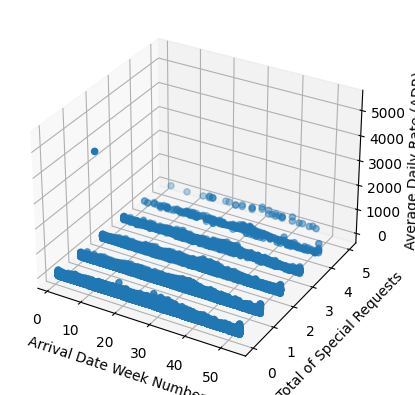

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(hotel_df['arrival_date_week_number'], hotel_df['total_of_special_requests'], hotel_df['adr'])

ax.set_xlabel('Arrival Date Week Number')
ax.set_ylabel('Total of Special Requests')
ax.set_zlabel('Average Daily Rate (ADR)')

plt.show()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

- **Số thứ tự tuần đến `arrival_date_week_number`**: Các điểm dữ liệu phân bố đều trên các tuần trong năm, cho thấy sự đặt phòng không tập trung vào một thời điểm cụ thể trong năm.

- **Tổng số yêu cầu đặc biệt `total_of_special_requests`**: Hầu hết các đặt phòng có số lượng yêu cầu đặc biệt từ thấp đến không có, điều này có thể cho thấy khách hàng không yêu cầu nhiều dịch vụ bổ sung.

- **Giá trung bình hàng ngày `adr`**: Có một số điểm ngoại lệ với `adr` rất cao, nhưng phần lớn các đặt phòng có giá từ thấp đến trung bình. Điều này có thể phản ánh mức giá phòng chuẩn hoặc mức giá phù hợp với đại đa số khách hàng.

- **Mối quan hệ giữa các biến**: Không có xu hướng rõ ràng giữa số tuần đến, số yêu cầu đặc biệt, và `adr` trên biểu đồ, nghĩa là không có mối quan hệ tuyến tính trực tiếp giữa các biến này.

- **Các yếu tố khác có thể ảnh hưởng**: Cần phải xem xét thêm các yếu tố khác có thể ảnh hưởng đến `adr` như loại phòng, mùa vụ, hoặc các sự kiện đặc biệt trong tuần lưu trú để có cái nhìn đầy đủ hơn về dữ liệu.

<a class = "anchor" id = "4.2"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>4.2 Phân tích dữ liệu bằng Scatter plot 2D và màu đối với hai biến Numerical và Category.</center></span>**

<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích cột `booking_changes` và `days_in_waiting_list`, được phân loại dữ liệu theo giá trị của cột `hotel`**

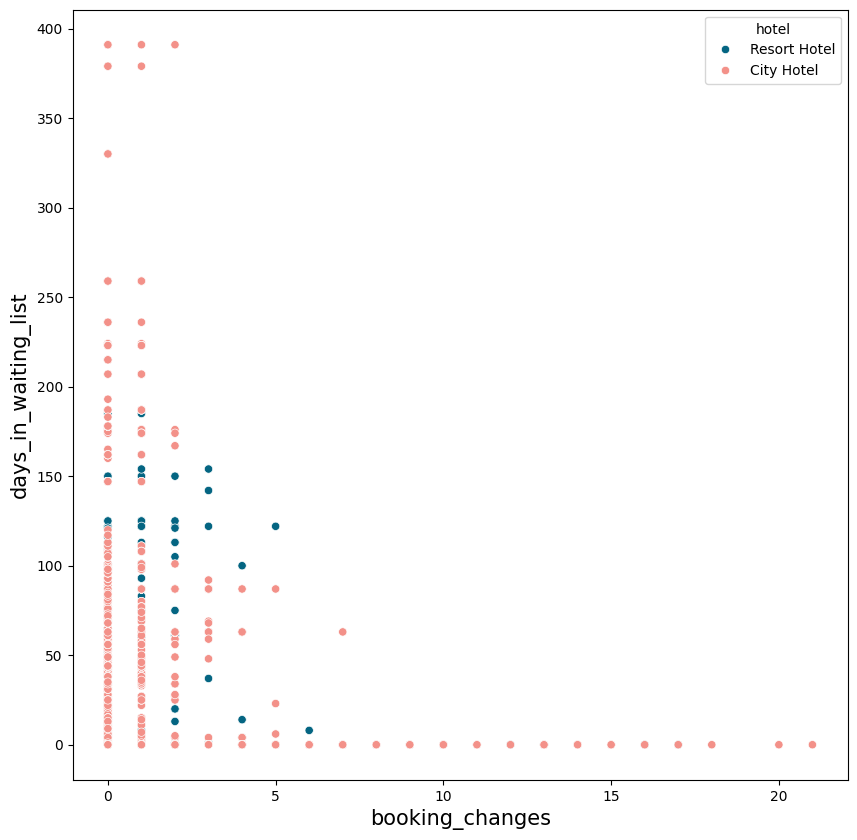

In [31]:
# EDA 3D
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=hotel_df, 
                x="booking_changes", 
                y="days_in_waiting_list", 
                hue='hotel',
                palette=['#046582', '#F39189'])  # Added the palette parameter
plt.xlabel('booking_changes', size = 15)
plt.ylabel('days_in_waiting_list', size = 15)
plt.show()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét</b></h2

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

Biểu đồ minh họa mối quan hệ giữa `booking_changes` và `days_in_waiting_list`, được phân loại theo loại `hotel`.

- Trục hoành biểu diễn `booking_changes`, chỉ số lượng thay đổi đặt phòng.
- Trục tung thể hiện `days_in_waiting_list`, số ngày khách hàng phải chờ trước khi đặt phòng được xác nhận.
- Hai màu sắc khác biệt đại diện cho hai loại khách sạn, có lẽ là Resort Hotel và City Hotel.
- Hầu hết các đặt phòng, bất kể loại khách sạn, có ít hơn 5 thay đổi. Điều này cho thấy khách hàng thông thường không thường xuyên thực hiện nhiều thay đổi cho đặt phòng của họ.
- Có một sự tập trung các điểm dữ liệu ở phía dưới của `days_in_waiting_list`, cho thấy rằng thông thường khách hàng không cần phải chờ đợi lâu để đặt phòng được xác nhận.
- Có những điểm ngoại lệ với số `days_in_waiting_list` cao, đặc biệt là với khách sạn dường như là City Hotels. Điều này có thể chỉ ra những trễ nãi trong việc xử lý đặt phòng hoặc một số tình huống cụ thể yêu cầu thời gian chờ đợi lâu hơn.
- Sự phân bố của `booking_changes` trở nên thưa thớt khi số lượng thay đổi tăng lên, với ít trường hợp khách hàng thực hiện nhiều thay đổi cho đặt phòng của họ.
- Không có xu hướng rõ ràng hoặc mô hình cho thấy mối quan hệ giữa `booking_changes` và `days_in_waiting_list`, gợi ý rằng số lượng thay đổi đặt phòng không ảnh hưởng đáng kể đến thời gian khách hàng chờ đợi xác nhận.


<h2 style="color:#498059 ;font-size: 1em "><b>

 👉 **Phân tích cột `stays_in_weekend_nights` và `stays_in_week_nights`, được phân loại dữ liệu theo giá trị của cột `customer_type`**

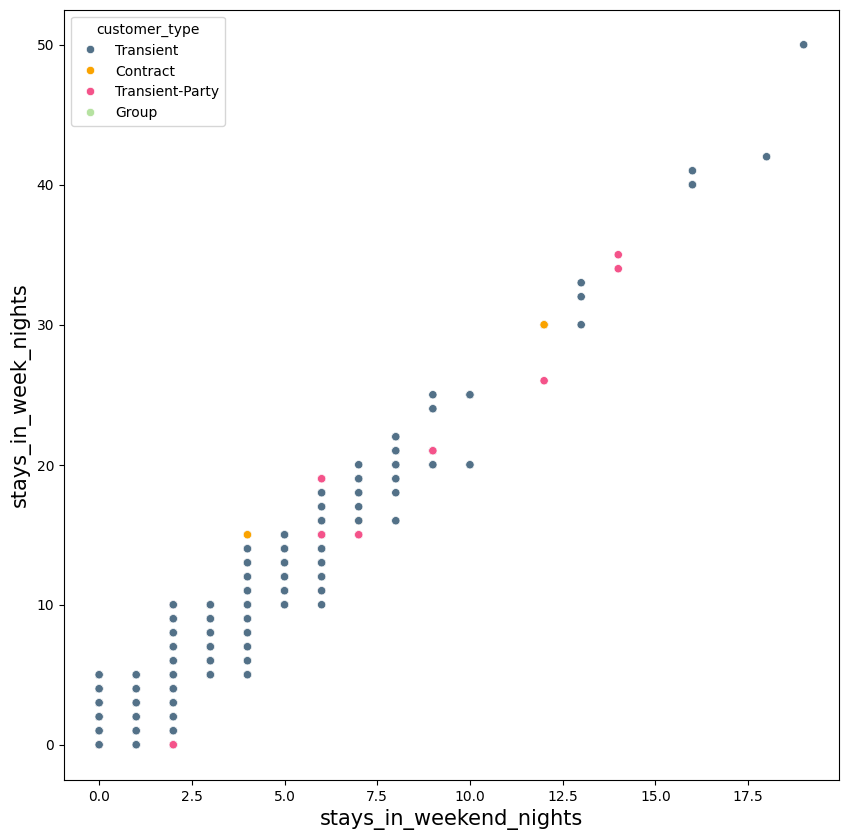

In [32]:
# EDA 3D
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=hotel_df, x="stays_in_weekend_nights", 
                     y="stays_in_week_nights", 
                     hue='customer_type',
                     palette=['#537188', '#FAA300', '#F4538A', '#B6E2A1'])
plt.xlabel('stays_in_weekend_nights', size = 15)
plt.ylabel('stays_in_week_nights', size = 15)
plt.show()

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét </b></h>

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

Biểu đồ thể hiện mối quan hệ giữa `stays_in_weekend_nights` (số đêm ở cuối tuần) và `stays_in_week_nights` (số đêm trong tuần), với sự phân loại dựa trên `customer_type` (loại khách hàng).

- Trục hoành đại diện cho `stays_in_weekend_nights`, trong khi trục tung đại diện cho `stays_in_week_nights`.
- Các điểm dữ liệu được tô màu khác nhau để phản ánh các loại khách hàng khác nhau: `Transient` (tạm thời), `Contract` (hợp đồng), `Transient-Party` (đoàn khách tạm thời), và `Group` (nhóm).
- Đa số khách hàng ở cả cuối tuần và trong tuần dưới 10 đêm. Điều này phản ánh một khuynh hướng chung là thời gian lưu trú thường không quá dài.
- Khách hàng thuộc loại `Transient` và `Transient-Party` phổ biến hơn so với `Contract` và `Group`, dựa trên số lượng điểm dữ liệu.
- Có vài trường hợp nổi bật với số đêm lưu trú rất cao, đặc biệt là trong nhóm `Transient`, có thể chỉ ra những trường hợp đặc biệt hoặc những khách hàng lưu trú dài hạn.
- Không có sự phân bố đều của điểm dữ liệu trên toàn bộ phạm vi trục hoành, mà chúng tập trung chủ yếu ở phía bên trái của biểu đồ.
- Không thấy một mối quan hệ rõ ràng giữa số đêm lưu trú vào cuối tuần và trong tuần, cho thấy số đêm ở vào cuối tuần không nhất thiết liên quan mật thiết tới số đêm ở trong tuần.

<a class = "anchor" id = "4.3"></a>
### **<span style="color:#B56C60;font-family: Times New Roman;"><center>4.3 Tỷ trọng theo bin chia theo thể loại với hai biến Category</center></span>**

<h2 style="color:#498059 ;font-size: 1em "><b> 👉Liệt kê num_list và cate_list </b></h>

In [33]:
num_list = ['lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']
cate_list = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status']

<h2 style="color:#498059 ;font-size: 1em "><b> 

👉**Phân tích sự phân bố của `lead_time` và `arrival_date_year` dựa trên `customer_type`**

In [34]:
hotel_df.groupby('customer_type').agg({'lead_time': ['min', 'mean', 'std', 'max'], 'arrival_date_year': ['min', 'mean', 'std', 'max']})

lead_time                              arrival_date_year  \
                      min        mean         std  max               min   
customer_type                                                              
Contract                0  109.225231  103.598039  532              2015   
Group                   0   51.584559   88.675294  468              2015   
Transient               0   73.427236   79.039874  737              2015   
Transient-Party         0  113.032574  109.452057  542              2015   

                                              
                        mean       std   max  
customer_type                                 
Contract         2015.615801  0.796874  2017  
Group            2016.060662  0.848570  2017  
Transient        2016.264190  0.659463  2017  
Transient-Party  2016.045536  0.703400  2017

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét </b></h>

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

Bảng dữ liệu phân tích sự phân bố của `lead_time` và `arrival_date_year` dựa trên `customer_type`, bao gồm **Contract**, **Group**, **Transient**, và **Transient-Party**.
- Đối với khách hàng loại **Contract**:
  - `lead_time` trung bình là 109.225231 ngày, với độ lệch chuẩn 103.598039 và phạm vi từ 0 đến 532 ngày.
  - Năm đến trung bình là 2015.615801, phạm vi từ năm 2015 đến 2017.
- Đối với khách hàng loại **Group**:
  - `lead_time` trung bình ngắn hơn, ở mức 51.584559 ngày, độ lệch chuẩn 88.675294, phạm vi từ 0 đến 468 ngày.
  - Năm đến trung bình gần với 2016 (2016.060662), phạm vi từ 2015 đến 2017.
- Khách hàng **Transient**:
  - Có `lead_time` trung bình là 73.427236 ngày, với độ lệch chuẩn 79.039874, phạm vi từ 0 đến 737 ngày.
  - Năm đến trung bình là 2016.264190, phạm vi từ 2015 đến 2017.
- Đối với **Transient-Party**:
  - `lead_time` trung bình cao hơn là 113.032574 ngày, độ lệch chuẩn 109.452057, phạm vi từ 0 đến 542 ngày.
  - Năm đến trung bình là 2016.045536, phạm vi từ 2015 đến 2017.

**Insight**
- Khách hàng loại **Contract** và **Transient-Party** thường có thời gian dẫn (lead time) dài hơn so với **Group** và **Transient**, điều này có thể liên quan đến tính chất đặt phòng trước và kế hoạch cụ thể hơn của những nhóm khách hàng này.
- Khách hàng **Transient**, với thời gian dẫn trung bình ngắn hơn và phạm vi lớn, có thể phản ánh sự linh hoạt hơn trong việc lên kế hoạch du lịch.
- Các khách sạn và doanh nghiệp du lịch có thể cân nhắc điều chỉnh chiến lược marketing và cung cấp gói dịch vụ linh hoạt hơn cho khách hàng **Transient**, trong khi đối với khách hàng **Contract** và **Transient-Party**, nên tập trung vào việc cung cấp dịch vụ ổn định và dài hạn.


<h2 style="color:#498059 ;font-size: 1em "><b> 

👉**Phân tích sự phân bố của `adr` và `stays_in_week_nights` dựa trên `customer_type`**

In [36]:
hotel_df.groupby('customer_type').agg({'adr': ['min', 'mean', 'std', 'max'], 'stays_in_week_nights': ['min', 'mean', 'std', 'max']})

adr                                stays_in_week_nights  \
                  min        mean        std     max                  min   
customer_type                                                               
Contract         0.00   92.753036  35.095893   250.0                    0   
Group            0.00   84.361949  51.449532   318.0                    0   
Transient        0.00  110.135859  56.613558  5400.0                    0   
Transient-Party -6.38   87.675056  43.821641   451.5                    0   

                                         
                     mean       std max  
customer_type                            
Contract         4.350430  2.877603  30  
Group            2.082721  1.909209  10  
Transient        2.582919  2.014587  50  
Transient-Party  2.449561  1.810809  35

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét </b></h>

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

- Bảng dữ liệu này phân tích sự phân bố của `adr` và `stays_in_week_nights` dựa trên `customer_type`, bao gồm **Contract**, **Group**, **Transient**, và **Transient-Party**.
- Đối với khách hàng loại **Contract**:
  - `adr` trung bình là 92.753036, với độ lệch chuẩn 35.095893 và phạm vi từ 0 đến 250.
  - Số đêm lưu trú trung bình trong tuần là 4.350430, độ lệch chuẩn 2.877603, phạm vi từ 0 đến 30 đêm.
- Đối với khách hàng loại **Group**:
  - `adr` trung bình là 84.361949, độ lệch chuẩn 51.449532, phạm vi từ 0 đến 318.
  - Số đêm lưu trú trung bình trong tuần là 2.082721, độ lệch chuẩn 1.909209, phạm vi từ 0 đến 10 đêm.
- Khách hàng **Transient**:
  - Có `adr` trung bình cao nhất là 110.135859, độ lệch chuẩn 56.613558, phạm vi từ 0 đến 5400.
  - Số đêm lưu trú trung bình trong tuần là 2.582919, độ lệch chuẩn 2.014587, phạm vi từ 0 đến 50 đêm.
- Đối với **Transient-Party**:
  - `adr` trung bình là 87.675056, độ lệch chuẩn 43.821641, phạm vi từ -6.38 đến 451.5.
  - Số đêm lưu trú trung bình trong tuần là 2.449561, độ lệch chuẩn 1.810809, phạm vi từ 0 đến 35 đêm.

**Insight từ bảng biểu:**
- Khách hàng **Transient** có `adr` trung bình cao nhất và cũng là nhóm có thời gian lưu trú dài nhất, điều này cho thấy họ sẵn sàng chi trả nhiều hơn cho mỗi đêm lưu trú.
- Khách hàng loại **Contract** có xu hướng ở lại lâu hơn trong tuần, có thể do họ đi công tác hoặc có nhu cầu ở lâu dài.
- **Group** và **Transient-Party** có `adr` và số đêm lưu trú trung bình thấp hơn, cho thấy họ có xu hướng chi trả ít hơn và ở ngắn hạn hơn.
- Những thông tin này có thể giúp các khách sạn và doanh nghiệp du lịch điều chỉnh giá và dịch vụ phù hợp với từng nhóm khách hàng, như tạo ra các gói ưu đãi cho khách hàng dài hạn,...
- Các nhà cung cấp dịch vụ lưu trú nên xem xét việc tạo ra các gói dịch vụ và giá cả phù hợp với từng nhóm khách hàng, đặc biệt là cung cấp các lựa chọn giá phòng linh hoạt cho khách hàng **Transient** do nhu cầu và khả năng chi trả đa dạng của họ.


<h2 style="color:#498059 ;font-size: 1em "><b> 

👉**Phân tích sự phân bố của `adr` và `stays_in_week_nights` dựa trên `customer_type`**

In [37]:
hotel_df.groupby('customer_type').agg({'total_of_special_requests': ['min', 'mean', 'std', 'max'], 'previous_cancellations': ['min', 'mean', 'std', 'max']})

total_of_special_requests                          \
                                      min      mean       std max   
customer_type                                                       
Contract                                0  0.838484  0.883441   5   
Group                                   0  0.645221  0.854549   5   
Transient                               0  0.732073  0.837191   5   
Transient-Party                         0  0.457918  0.736872   5   

                previous_cancellations                          
                                   min      mean       std max  
customer_type                                                   
Contract                             0  0.064989  0.247835   2  
Group                                0  0.029412  0.189646   2  
Transient                            0  0.027908  0.361188  26  
Transient-Party                      0  0.036582  0.443009  24

<h2 style="color:#498059 ;font-size: 1em "><b>💬Nhận xét </b></h>

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E3F5F9   ;
           font-size:110%;
            text-align: left;
            text: black">

Bảng dữ liệu này cung cấp thông tin về phân bố của `total_of_special_requests` và `previous_cancellations` cho các loại khách hàng: **Contract**, **Group**, **Transient**, và **Transient-Party**.
- Đối với khách hàng loại **Contract**:
  - Số yêu cầu đặc biệt trung bình là 0.838484, với độ lệch chuẩn là 0.883441 và tối đa là 5 yêu cầu.
  - Số lần hủy trước đó trung bình là 0.064989, độ lệch chuẩn 0.247835, và tối đa là 2 lần.
- Khách hàng **Group**:
  - Số yêu cầu đặc biệt trung bình ít hơn, là 0.645221, độ lệch chuẩn 0.854549, và tối đa cũng là 5.
  - Số lần hủy trước đó trung bình chỉ là 0.029412, độ lệch chuẩn 0.189646, và tối đa là 2 lần.
- Khách hàng **Transient**:
  - Có số yêu cầu đặc biệt trung bình là 0.732073, với độ lệch chuẩn là 0.837191 và tối đa là 5 yêu cầu.
  - Số lần hủy trước đó trung bình là 0.027908, độ lệch chuẩn 0.361188, và tối đa là 26 lần.
- Đối với **Transient-Party**:
  - Số yêu cầu đặc biệt trung bình thấp nhất trong các nhóm là 0.457918, với độ lệch chuẩn là 0.736872 và tối đa là 5 yêu cầu.
  - Số lần hủy trước đó trung bình là 0.036582, độ lệch chuẩn 0.443009, và tối đa là 24 lần.

**Insight từ bảng biểu:**
- Khách hàng **Contract** và **Transient** có xu hướng yêu cầu nhiều dịch vụ đặc biệt hơn so với các nhóm khách khác.
- Mặc dù khách hàng **Transient** có số lần hủy trước đó ít, nhưng số lần hủy tối đa cao bất thường (26 lần), có thể phản ánh sự không chắc chắn hoặc thay đổi kế hoạch thường xuyên của nhóm này.
- Khách hàng **Transient-Party** ít yêu cầu dịch vụ đặc biệt và có tỷ lệ hủy trước đó thấp, phản ánh tính linh hoạt và quyết định đặt phòng gần ngày lưu trú hơn.
- Các nhà cung cấp dịch vụ lưu trú nên xem xét việc tăng cường các dịch vụ đặc biệt để đáp ứng nhu cầu của khách hàng **Contract** và **Transient**, đồng thời chú ý đến xu hướng hủy đặt phòng của các nhóm khách khác.


<a id="5"></a>
## <div style="text-align: left; background-color:#F2D6AE ; font-family: Times New Roman;  color: #B56C60; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: #B56C60;">5. Insight 💡</div> 

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E9F6D7   ;
           font-size:110%;
            text-align: left;
            text: black">

- Bữa ăn **Bed & Breakfast** và loại phòng **A** dường như là lựa chọn phổ biến, và hầu hết khách hàng đặt phòng thông qua các **kênh trực tuyến** và **không yêu cầu tiền đặt cọc**. [2.1] 
- Số lượng `adults` trong các đặt phòng thường cao hơn so với `children` và `babies`. [2.2]
- Số lượng đặt phòng thông qua `agent` cao hơn nhiều so với `company`, cho thấy sự ưu tiên sử dụng đại lý du lịch. [2.2]

<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E9F6D7   ;
           font-size:110%;
            text-align: left;
            text: black">

- `total_of_special_requests` có tương quan tiêu cực với `is_canceled, điều này có thể chỉ ra rằng càng nhiều yêu cầu đặc biệt được đưa ra, khả năng khách hàng sẽ không hủy đặt phòng. [3.1]
-  `lead_time` và `is_canceled` có tương quan tích cực mạnh, cho thấy thời gian từ khi đặt đến ngày đến càng lâu, khả năng hủy đặt phòng càng cao. [3.1]
- `previous_cancellations` có tương quan tích cực với `is_canceled, nghĩa là khách hàng đã từng hủy bỏ đặt phòng trước đây có nhiều khả năng sẽ hủy lại. [3.1]
- Đa số các đặt phòng không phải chờ đợi quá lâu trước khi được xác nhận hoặc chỉ thực hiện một số ít thay đổi. [3.2]
- Những khách hàng loại `Transient-Party` có thời gian chờ đợi trong danh sách chờ lâu nhất. [3.3] 


<div style="border-radius:10px;
            border :#404F69 solid;
            padding: 15px;
            background-color:#E9F6D7   ;
           font-size:110%;
            text-align: left;
            text: black">

- Sự đặt phòng không tập trung vào một thời điểm cụ thể trong năm. [4.1]
- Hầu hết các đặt phòng, bất kể loại khách sạn, có ít hơn 5 thay đổi. Điều này cho thấy khách hàng thông thường không thường xuyên thực hiện nhiều thay đổi cho đặt phòng của họ. [4.1]
- Không thấy một mối quan hệ rõ ràng giữa số đêm lưu trú vào cuối tuần và trong tuần, cho thấy số đêm ở vào cuối tuần không nhất thiết liên quan mật thiết tới số đêm ở trong tuần. [4.2]            
- Khách hàng loại **Contract** và **Transient-Party** thường có thời gian dẫn `lead time` dài hơn so với **Group** và **Transient**, điều này có thể liên quan đến tính chất đặt phòng trước và kế hoạch cụ thể hơn của những nhóm khách hàng này. [4.3]
- Khách hàng **Transient**, với thời gian dẫn trung bình ngắn hơn và phạm vi lớn, có thể phản ánh sự linh hoạt hơn trong việc lên kế hoạch du lịch. [4.3]
- Khách hàng **Contract** và **Transient** có xu hướng yêu cầu nhiều dịch vụ đặc biệt hơn so với các nhóm khách khác. [4.3]
- Mặc dù khách hàng **Transient** có số lần hủy trước đó ít, nhưng số lần hủy tối đa cao bất thường (26 lần), có thể phản ánh sự không chắc chắn hoặc thay đổi kế hoạch thường xuyên của nhóm này. [4.3]
- Khách hàng **Transient-Party** ít yêu cầu dịch vụ đặc biệt và có tỷ lệ hủy trước đó thấp, phản ánh tính linh hoạt và quyết định đặt phòng gần ngày lưu trú hơn. [4.3]

<div style="text-align: left; background-color:#B5C4C1; font-family: Times New Roman; color:#404F69; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: #404F69;">Kết thúc</div>